# Data Transformation Task for Data Mining Project

This notebook is dedicated to the data transformation task of the data mining project. Specifically, it will address the following tasks:

1. Replace the `nan` values in the `climb_total` feature based on the information provided by the `length` of the race.
2. Once the `climb_total` has been filled, replace the `nan` values in the `profile` feature based on the `climb_total` distribution.
3. Understand which features are interesting for the analysis.
4. Apply the formula to compute the `points` feature.
5. Apply Principal Component Analysis (PCA) to the `points` and `uci_points` features.

This notebook will guide you through each step, ensuring a comprehensive understanding of the data transformation process.


### Check for Virtual Env

This section is dedicated to verifying whether a Python virtual environment is active. A virtual environment is an isolated environment that allows you to manage dependencies for your project separately from the global Python installation. This helps in avoiding conflicts between different projects' dependencies and ensures that your project runs with the specific versions of packages it requires.

In [178]:
import sys
import subprocess

# Check if running in a virtual environment


if sys.prefix != sys.base_prefix:
    print("Running in a virtual environment.")

print("Python version: ", sys.version)
print("Python prefix: ", sys.prefix)

result = subprocess.run(['pip', '-V'], stdout=subprocess.PIPE, text=True)

if "envs" in result.stdout:
    print("Running in a virtual environment.")
else:
    print("Not running in a virtual environment.")
    print("Are you sure you want to continue?")

Python version:  3.13.0 | packaged by conda-forge | (main, Oct  8 2024, 20:04:32) [GCC 13.3.0]
Python prefix:  /home/lesi-nedo/miniforge3/envs/DM
Running in a virtual environment.



### Install or Import Packages

In the next Python cell, we will ensure that all necessary packages are installed or imported. This step is crucial to make sure that we have all the dependencies required for the data transformation tasks in this notebook.

In [179]:
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check if pandas is installed
try:
    import pandas as pd
    print("pandas is already installed")
except ImportError:
    print("pandas not found, installing...")
    install("pandas")
    print("pandas has been installed")
    import pandas as pd

# Check if numpy is installed
try:
    import numpy as np
    print("numpy is already installed")
except ImportError:
    print("numpy not found, installing...")
    install("numpy")
    print("numpy has been installed")
    import numpy as np

# Check if matplotlib is installed
try:
    import matplotlib.pyplot as plt
    print("matplotlib is already installed")
except ImportError:
    print("matplotlib not found, installing...")
    install("matplotlib")
    print("matplotlib has been installed")
    import matplotlib.pyplot

# Check if seaborn is installed
try:
    import seaborn as sns
    print("seaborn is already installed")
except ImportError:
    print("seaborn not found, installing...")
    install("seaborn")
    print("seaborn has been installed")
    import seaborn as sns

# Check if scikit-learn is installed
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score, silhouette_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score, RandomizedSearchCV
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer
    from sklearn.compose import ColumnTransformer
    from sklearn.experimental import enable_iterative_imputer  # noqa
    from sklearn.impute import IterativeImputer
    from sklearn.neighbors import KNeighborsRegressor





    print("scikit-learn is already installed")
except ImportError:
    print("scikit-learn not found, installing...")
    install("scikit-learn")
    print("scikit-learn has been installed")
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import root_mean_squared_error as mse
    from sklearn.metrics import r2_score, silhouette_score
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import cross_val_score, RandomizedSearchCV
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer
    from sklearn.compose import ColumnTransformer
    from sklearn.experimental import enable_iterative_imputer  # noqa
    from sklearn.impute import IterativeImputer
    from sklearn.neighbors import KNeighborsRegressor






# Check if scipy is installed
try:
    from scipy.stats import kstest
    from scipy import stats
    print("scipy is already installed")
except ImportError:
    print("scipy not found, installing...")
    install("scipy")
    print("scipy has been installed")
    from scipy.stats import kstest
    from scipy import stats


# Check if xgboost is installed
try:
    from xgboost import XGBRegressor
    print("xgboost is already installed")
except ImportError:
    print("xgboost not found, installing...")
    install("xgboost")
    print("xgboost has been installed")
    from xgboost import XGBRegressor

# Check if lightgbm is installed
try:
    from lightgbm import LGBMRegressor
    print("lightgbm is already installed")
except ImportError:
    print("lightgbm not found, installing...")
    install("lightgbm")
    print("lightgbm has been installed")
    from lightgbm import LGBMRegressor


# check if tqdm is installed
try:
    from tqdm import tqdm
    print("tqdm is already installed")
except ImportError:
    print("tqdm not found, installing...")
    install("tqdm")
    print("tqdm has been installed")
    from tqdm import tqdm


# check if ipywidgets is installed
try:
    from ipywidgets import interact
    print("ipywidgets is already installed")
except ImportError:
    print("ipywidgets not found, installing...")
    install("ipywidgets")
    print("ipywidgets has been installed")
    from ipywidgets import interact
    
# check if pandarallel is installed
try:
    from pandarallel import pandarallel
    print("pandarallel is already installed")
    pandarallel.initialize(progress_bar=True)
except ImportError:
    print("pandarallel not found, installing...")
    install("pandarallel")
    print("pandarallel has been installed")
    from pandarallel import pandarallel
    pandarallel.initialize(progress_bar=True)
    


pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
scikit-learn is already installed
scipy is already installed
xgboost is already installed
lightgbm is already installed
tqdm is already installed
ipywidgets is already installed
pandarallel is already installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Import Dataset

In the next cell, we will import the dataset called `races`. This dataset will be used for the data transformation tasks outlined in this notebook.

In [180]:
# Assuming the dataset is in a CSV file named 'races.csv'
races_ = pd.read_csv('dataset/races.csv')

# The dataset contains information about races, including race name, date, distance, and location.
# Print the information about the races dataframe
print("The races dataframe contains information about races, including race name, date, distance, and location.")


# Print the summary information of the races dataframe
races_.info(verbose=True, show_counts=True)


The races dataframe contains information about races, including race name, date, distance, and location.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac     

### Identifying Common Races with Missing and Complete Climb Total Data

In this section, we aim to identify races that have both missing and complete `climb_total` data. This is achieved by grouping the dataset by the `_url` and `name` columns, and then calculating the number of missing values in the `climb_total` feature for each group. 

We then separate the groups into two categories:
1. `res_na`: Groups where the `climb_total` feature has missing values.
2. `res_no_na`: Groups where the `climb_total` feature has no missing values.

Finally, we identify the common indices between these two categories, which represent the races that have both missing and complete `climb_total` data. This information is crucial for understanding the distribution of missing data and for designing appropriate imputation strategies.


In [181]:
grouped = races_.groupby(["_url", "name"])
res_temp = grouped[['_url', 'name', 'climb_total']].apply(lambda x: x.isna().sum())
res_na = res_temp[res_temp['climb_total'] > 0]
res_no_na = res_temp[res_temp['climb_total'] == 0]


common_index = res_na.index.intersection(res_no_na.index)
common_index

MultiIndex([], names=['_url', 'name'])

### Identifying Common Races with Missing and Complete Profile Data

In this section, we aim to identify races that have both missing and complete `profile` data. This is achieved by grouping the dataset by the `_url` and `name` columns, and then calculating the number of missing values in the `profile` feature for each group. 

We then separate the groups into two categories:
1. `res_na`: Groups where the `profile` feature has missing values.
2. `res_no_na`: Groups where the `profile` feature has no missing values.

Finally, we identify the common indices between these two categories, which represent the races that have both missing and complete `profile` data. This information is crucial for understanding the distribution of missing data and for designing appropriate imputation strategies.


In [182]:
res_temp = grouped[['_url', 'name', 'profile']].apply(lambda x: x.isna().sum())

res_na = res_temp[res_temp['profile'] > 0]
res_no_na = res_temp[res_temp['profile'] == 0]

common_index = res_na.index.intersection(res_no_na.index)
common_index

MultiIndex([], names=['_url', 'name'])

### Visualization of Prediction Errors and Segment Analysis

In this section, we will create comprehensive visualizations to analyze the prediction errors and segment performance for the `climb_total` feature. The visualizations include:

1. **Distribution of Actual vs Predicted Climb Total**: A KDE plot to compare the distributions of actual and predicted values.
2. **Scatter Plot with Perfect Prediction Line**: A scatter plot to visualize the relationship between actual and predicted values, with a line indicating perfect predictions.
3. **Distribution of Prediction Errors**: A histogram to show the distribution of prediction errors.
4. **Q-Q Plot of Prediction Errors**: A Q-Q plot to assess the normality of prediction errors.
5. **Prediction Error vs Actual Climb Total**: A scatter plot to visualize the prediction errors against actual values.

Additionally, we will create visualizations for segment analysis, including:

1. **Segment Size Distribution**: A bar plot showing the size of the top 20 largest segments.
2. **Segment Confidence Distribution**: A bar plot showing the mean prediction confidence for the top 20 segments.
3. **Distribution Types by Segment Size**: A stacked bar plot showing the distribution types used for different segment sizes.
4. **Prediction Range by Segment**: A bar plot showing the mean and standard deviation of predicted climb totals for the top 20 segments.

These visualizations will help us understand the performance of our prediction model and the characteristics of different segments in the dataset.


In [183]:
from scipy import stats


def errors_visualization(y_true, y_pred):
    # Create figure with more height to accommodate labels
    fi = plt.figure(figsize=(30, 15))  # Increased height from 10 to 15
    
    # Create GridSpec with more space between plots
    gs = plt.GridSpec(3, 2, figure=fi, hspace=0.4)  # Added hspace parameter for vertical spacing
    
    ax1 = fi.add_subplot(gs[0, 0])
    sns.kdeplot(data=y_true, label='Actual', ax=ax1)
    sns.kdeplot(data=y_pred, label='Predicted', ax=ax1)
    ax1.set_title('Distribution of Actual vs Predicted Climb Total', pad=20)  # Added padding to title
    ax1.set_xlabel('Climb Total (meters)', labelpad=10)  # Added padding to xlabel
    ax1.set_ylabel('Density', labelpad=10)  # Added padding to ylabel
    ax1.legend()
    
    # 2. Scatter Plot with Perfect Prediction Line
    ax2 = fi.add_subplot(gs[0, 1])
    ax2.scatter(y_true, y_pred, alpha=0.5)
    
    # Add perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    ax2.set_title('Actual vs Predicted Climb Total', pad=20)
    ax2.set_xlabel('Actual Climb Total (meters)', labelpad=10)
    ax2.set_ylabel('Predicted Climb Total (meters)', labelpad=10)
    ax2.legend()

    ax3 = fi.add_subplot(gs[1, 0])
    error = y_pred - y_true
    sns.histplot(data=error, bins=50, ax=ax3)
    ax3.axvline(x=0, color='r', linestyle='--', label='Zero Error')
    ax3.set_title('Distribution of Prediction Errors', pad=20)
    ax3.set_xlabel('Prediction Error (meters)', labelpad=10)
    ax3.set_ylabel('Count', labelpad=10)
    ax3.legend()

    # 9. Q-Q Plot of Prediction Errors
    ax4 = fi.add_subplot(gs[1, 1])
    stats.probplot(error, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot of Prediction Errors', pad=20)
    
    # 10. Error vs Actual Value
    ax5 = fi.add_subplot(gs[2, 0])
    ax5.scatter(y_true, error, alpha=0.5)
    ax5.axhline(y=0, color='r', linestyle='--', label='Zero Error')
    ax5.set_title('Prediction Error vs Actual Climb Total', pad=20)
    ax5.set_xlabel('Actual Climb Total (meters)', labelpad=10)
    ax5.set_ylabel('Prediction Error (meters)', labelpad=10)
    ax5.legend()
    
    # Adjust layout with extra padding
    plt.tight_layout(pad=3.0, h_pad=1.0, w_pad=1.0)

def create_prediction_visualizations(df, y_true, summary_stats, feature_name, save_path=None):
    """
    Create comprehensive visualizations for the prediction results
    Parameters:
    
    df (pd.DataFrame): DataFrame containing predictions and actual values
    summary_stats (dict): Dictionary containing summary statistics
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None
    """
    # Set up the style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))
    gs = plt.GridSpec(3, 2, figure=fig)
    
    y_pred = df.loc[y_true.index, f'{feature_name}_predicted']

    print(f"Length true data: {len(y_true)}")
    print(f"Length predicted data: {len(y_pred)}")

    print(f"Mean true data: {y_true.mean()}")
    print(f"Mean predicted data: {y_pred.mean()}")
    
    print(f"STD of true data: {y_true.std()}")
    print(f"STD of predicted data: {y_pred.std()}")

    errors_visualization(y_true, y_pred)
    
    
    ax1 = fig.add_subplot(gs[0, 0])

    # 1. Prediction Confidence Distribution
    sns.histplot(data=df['prediction_confidence'], bins=50, ax=ax1)
    ax1.set_title('Distribution of Prediction Confidence')
    ax1.set_xlabel('Confidence Score')
    ax1.set_ylabel('Count')

    ax2 = fig.add_subplot(gs[0, 1])
    # 2. Distribution Usage Pie Chart
    dist_usage = pd.Series(summary_stats['distribution_usage'])
    ax2.pie(dist_usage.values, labels=dist_usage.index, autopct='%1.1f%%')
    ax2.set_title('Distribution Types Used in Predictions')
    
    # 3. Feature Importance Plot
    ax3 = fig.add_subplot(gs[1, 0])
    feature_importance = pd.Series(summary_stats['feature_importance'])
    feature_importance.sort_values().plot(kind='barh', ax=ax3)
    ax3.set_title('Feature Importance in Prediction')
    ax3.set_xlabel('Absolute Correlation with Climb Total')
    
    error = y_pred - y_true
    
    # 4. Confidence vs Error Plot
    ax4 = fig.add_subplot(gs[1, 1])
    abs_error = abs(error)
    ax4.scatter(df.loc[y_true.index]['prediction_confidence'], abs_error, alpha=0.5)
    ax4.set_title('Prediction Confidence vs Absolute Error')
    ax4.set_xlabel('Confidence Score')
    ax4.set_ylabel('Absolute Error (meters)')
    
    # 5. Segment Performance
    ax5 = fig.add_subplot(gs[2, 0])
    segment_performance = df.loc[y_true.index].groupby('segment', observed=True).apply(
        lambda x: np.mean(abs(x[f'{feature_name}_predicted'] - x[feature_name])), include_groups = False
    ).sort_values()
    segment_performance.head(20).plot(kind='barh', ax=ax5)
    ax5.set_title('Top 20 Best Performing Segments')
    ax5.set_xlabel('Mean Absolute Error (meters)')
    
    
    
    # Adjust layout and display/save
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def create_segment_analysis(df, feature_name, save_path=None):
    """
    Create detailed visualizations for segment analysis
    
    Parameters:
    df (pd.DataFrame): DataFrame containing predictions and segment information
    save_path (str, optional): Path to save the plots. If None, plots are displayed
    
    Returns:
    None{'type': 'numeric'}
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(20, 15))
    gs = plt.GridSpec(2, 2, figure=fig)
    
    
    # 1. Segment Size Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    segment_sizes = df.groupby('segment', observed=True).size().sort_values(ascending=False)
    segment_sizes.head(20).plot(kind='bar', ax=ax1)
    ax1.set_title('Top 20 Largest Segments')
    ax1.set_xlabel('Segment')
    ax1.set_ylabel('Number of Races')
    plt.xticks(rotation=45)
    
    # 2. Segment Confidence Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    segment_confidence = df.groupby('segment', observed=True)['prediction_confidence'].mean().sort_values(ascending=False)
    segment_confidence.head(20).plot(kind='bar', ax=ax2)
    ax2.set_title('Top 20 Segments by Confidence')
    ax2.set_xlabel('Segment')
    ax2.set_ylabel('Mean Confidence Score')
    plt.xticks(rotation=45)
    
    # 3. Distribution Type by Segment Size
    ax3 = fig.add_subplot(gs[1, 0])
    dist_by_size = df.groupby(['distribution_used', pd.qcut(segment_sizes, q=5)], observed=True)['segment'].count().unstack()
    if dist_by_size.isna().any().any():
        dist_by_size.plot(kind='bar', stacked=True, ax=ax3)
        ax3.set_title('Distribution Types by Segment Size Quintile')
        ax3.set_xlabel('Distribution Type')
        ax3.set_ylabel('Number of Segments')
        plt.xticks(rotation=45)
    
    # 4. Prediction Range by Segment
    ax4 = fig.add_subplot(gs[1, 1])
    segment_ranges = df.groupby('segment', observed=True).agg({
        f'{feature_name}_predicted': ['mean', 'std']
    }).sort_values((f'{feature_name}_predicted', 'mean'), ascending=False)
    
    segment_ranges.head(20)[(f'{feature_name}_predicted', 'mean')].plot(
        kind='bar', 
        yerr=segment_ranges.head(20)[(f'{feature_name}_predicted', 'std')],
        ax=ax4
    )
    ax4.set_title('Top 20 Segments by Mean Predicted Climb')
    ax4.set_xlabel('Segment')
    ax4.set_ylabel('Mean Predicted Climb Total (meters)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

def plot_interactive_analysis(df, feature_name):
    """
    Create interactive plots for detailed analysis
    Note: This requires running in a Jupyter notebook with interactive backend enabled
    """
    def update_segment_plot(segment):
        plt.figure(figsize=(12, 6))
        segment_data = df[df['segment'] == segment]
        mask = ~segment_data[feature_name].isna()
        
        plt.scatter(segment_data[mask][feature_name], 
                   segment_data[mask][f'{feature_name}_predicted'],
                   alpha=0.5)
        
        min_val = min(segment_data[mask][feature_name].min(),
                     segment_data[mask]['{feature_name}_predicted'].min())
        max_val = max(segment_data[mask][feature_name].max(),
                     segment_data[mask][f'{feature_name}_predicted'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', 
                 label='Perfect Prediction')
        
        plt.title(f'Actual vs Predicted Climb Total for Segment: {segment}')
        plt.xlabel('Actual Climb Total (meters)')
        plt.ylabel('Predicted Climb Total (meters)')
        plt.legend()
        plt.show()
    
    interact(update_segment_plot, 
            segment=df['segment'].unique())





### Data Preprocessing and Feature Engineering

In this section, we will preprocess the data and engineer new features to enhance the predictive power of our models. The steps include:

1. **Handling Missing Values**: We will use various imputation strategies to handle missing values in the dataset. This includes mean, median, and most frequent imputation, as well as iterative imputation using a RandomForestRegressor.
2. **Feature Scaling and Transformation**: We will apply robust scaling and power transformation to numeric features to ensure they are on a similar scale and to reduce skewness.
3. **Feature Engineering**: We will create new features such as `season`, `team_present`, `startlist_score_per_km`, and `adjusted_delta` to capture additional information from the existing data.
4. **Validation of Features**: We will ensure that all required features are present in the dataset and raise an error if any are missing.
5. **Imputation and Transformation**: We will apply the appropriate imputation and transformation techniques to each feature based on its type (numeric, boolean, or categorical).
6. **Aggregation**: Finally, we will aggregate the data at the race level to prepare it for further analysis and modeling.

This comprehensive preprocessing and feature engineering pipeline will help us build robust predictive models for the `climb_total` feature.

In [129]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
scaler = RobustScaler()
power = PowerTransformer(method='yeo-johnson')
power_climb_total = PowerTransformer(method='yeo-johnson')

iterative_imputer = IterativeImputer(max_iter=40, estimator=RandomForestRegressor())

races = races_.copy()
races['date'] = pd.to_datetime(races['date'])
races['month'] = races['date'].dt.month

races['season'] = races['month'].apply(lambda x: 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' if x in [9, 10, 11] else 'winter')
races['team_present'] = races['cyclist_team'].notnull().astype(int)
races['startlist_score_per_km'] = races['startlist_quality'] / races['length']

races['adjusted_delta'] = races['delta'] / races['length']


pred_features = {
    'length': {'type': 'numeric'},
    'points': {'type': 'numeric'},
    'startlist_quality': {'type': 'numeric'},
    'is_tarmac': {'type': 'boolean'},
    'profile': {'type': 'categorical'},
    'position': {'type': 'numeric'},
    'cyclist_age': {'type': 'numeric'},
    'adjusted_delta': {'type': 'numeric'},
    'startlist_score_per_km': {'type': 'numeric'},
    'uci_points': {'type': 'numeric'},
    'season': {'type': 'categorical'},
    'team_present': {'type': 'boolean'},
        
}

missing_features = [feature for feature in pred_features if feature not in races.columns]

if len(missing_features) > 0:
    raise ValueError(f"Missing features in the dataset: {missing_features}")


for feature, info in pred_features.items():
    if info['type'] == 'boolean':
        feature_data = races[feature].astype(float).to_numpy().reshape(-1, 1)
        imputed_data = iterative_imputer.fit_transform(feature_data)
        races[feature] = pd.Series(imputed_data.flatten(), index=races[feature].index)
    
    elif info['type'] == 'numeric' and not feature == "points":
        feature_data = races[feature].to_numpy().reshape(-1, 1)

        non_nan_data = races[feature].dropna()
        if len(non_nan_data) > 0:
            skewness = non_nan_data.skew()
            if abs(skewness) > 1:
                imputed_data = median_imputer.fit_transform(feature_data)
            else:
                imputed_data = mean_imputer.fit_transform(feature_data)
        else:
            imputed_data = median_imputer.fit_transform(feature_data)
        
        scaled_data = scaler.fit_transform(imputed_data)
        scaled_data = power.fit_transform(scaled_data)
        races[feature] = pd.Series(scaled_data.flatten(), index=races[feature].index)
    elif info['type'] == 'numeric' and feature == "points":
        # get the median for each cyclist
        res = races.groupby("cyclist").agg({feature: 'mean'})
        races_feat_nan = races[races[feature].isna()]
        races.loc[races_feat_nan.index, feature] = races[['cyclist', feature]].loc[races_feat_nan.index].apply(lambda x: res.loc[x['cyclist'], feature], axis=1)
        temp = races[feature].to_numpy().reshape(-1, 1)
        temp = power.fit_transform(temp)
        
        races[feature] = pd.Series(temp.flatten(), index=races.index)
    elif info['type'] == 'categorical':
        feature_data = pd.Categorical(races[feature]).to_numpy().reshape(-1, 1)
        imputed_data = LabelEncoder().fit_transform(feature_data)
        imputed_data = iterative_imputer.fit_transform(imputed_data.reshape(-1, 1))
        races[feature] = pd.Series(imputed_data.flatten(), index=races[feature].index)

races_agg = races.groupby(["_url", "name"]).agg({
    'length': 'first',
    'points': 'mean',
    'startlist_quality': 'first',
    'is_tarmac': 'first',
    'profile': 'first',
    'climb_total': 'first',
    'date': 'first',
    'position': 'median',
    'cyclist_age': 'median',
    'delta': 'mean',
    'uci_points': 'mean',
    'season': 'first',
    'team_present': 'first',
    'startlist_score_per_km': 'mean',
    'adjusted_delta': 'mean'
})
races_agg.sample(frac=0.4).head(10)

,,length,points,startlist_quality,is_tarmac,profile,climb_total,date,position,cyclist_age,delta,uci_points,season,team_present,startlist_score_per_km,adjusted_delta
_url,name,,,,,,,,,,,,,,,
tour-de-romandie/1977/stage-2,Tour de Romandie,0.045827,-1.130344,-2.138583,1.0,5.0,NaN,1977-05-12 05:32:44,-1.635843,0.718711,94.800000,0.194539,1.0,1.0,-1.981746,-0.567027
giro-d-italia/2018/stage-20,Giro d'Italia,0.739726,0.161919,-0.643664,1.0,4.0,4254.0,2018-05-26 05:43:48,0.097361,0.241030,2031.126667,0.743393,1.0,1.0,-1.053774,1.288334
vuelta-a-espana/1986/stage-2,Vuelta a España,0.062489,0.161919,-0.625414,1.0,5.0,2500.0,1986-04-24 04:24:45,-1.569350,-0.599508,0.000000,0.194539,1.0,0.0,-0.626147,-0.715492
il-lombardia/2021/result,Il Lombardia,1.370263,2.212961,0.096583,0.0,1.0,4659.0,2021-10-09 06:01:39,-0.370571,-0.020272,707.476636,4.143266,0.0,1.0,-0.713948,0.026906
paris-roubaix/2005/result,Paris - Roubaix,1.930753,2.212961,-1.259426,0.0,0.0,NaN,2005-04-10 06:29:38,-0.697638,0.486329,414.189873,0.194539,1.0,1.0,-2.040678,-0.281930
paris-roubaix/2011/result,Paris - Roubaix,1.901617,2.212961,-0.650991,0.0,0.0,NaN,2011-04-10 06:07:28,-0.370571,0.241030,512.766355,0.194539,1.0,1.0,-1.536777,-0.191100
vuelta-a-espana/2022/stage-16,La Vuelta ciclista a España,0.204746,0.161919,-0.200887,1.0,0.0,1076.0,2022-09-06 04:45:29,0.003099,-0.020272,140.900709,0.743393,0.0,1.0,-0.385588,-0.507195
tirreno-adriatico/2009/stage-5,Tirreno-Adriatico,-1.772236,-1.130344,0.448473,1.0,2.0,541.0,2009-03-15 00:41:32,0.447311,0.241030,216.043243,0.194539,1.0,1.0,1.728730,0.898563
vuelta-a-espana/2018/stage-13,La Vuelta ciclista a España,-0.066796,0.161919,0.003564,1.0,4.0,3334.0,2018-09-07 04:17:05,0.290401,-0.020272,895.532544,0.743393,0.0,1.0,-0.053864,0.458848



### Predicting Total Climb Values

In this section, we will compare the following algorithms to predict the `climb_total` values:

- Random Forest: `RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)`
- Gradient Boosting: `GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)`
- XGBoost: `XGBRegressor(n_estimators=100, max_depth=5, random_state=42)`
- LightGBM: `LGBMRegressor(n_estimators=100, max_depth=5, random_state=42)`
- Linear Regression: `LinearRegression()`
- Ridge: `Ridge(alpha=1.0)`
- Lasso: `Lasso(alpha=1.0)`

The prediction of `climb_total` will be performed using the best model among these algorithms.


Training Random Forest...
Random Forest Results:
RMSE: 25.53 meters
R²: 0.778
CV RMSE: 708.03 ± 55.82 meters

Training Gradient Boosting...
Gradient Boosting Results:
RMSE: 25.02 meters
R²: 0.796
CV RMSE: 690.77 ± 54.53 meters

Training XGBoost...
XGBoost Results:
RMSE: 25.03 meters
R²: 0.795
CV RMSE: 685.00 ± 57.84 meters

Training LightGBM...
LightGBM Results:
RMSE: 25.32 meters
R²: 0.786
CV RMSE: 694.11 ± 58.19 meters

Training Huber...
Huber Results:
RMSE: 31.00 meters
R²: 0.518
CV RMSE: 1052.95 ± 303.06 meters

Training Linear Regression...
Linear Regression Results:
RMSE: 30.45 meters
R²: 0.552
CV RMSE: 1070.51 ± 243.87 meters

Training Ridge...
Ridge Results:
RMSE: 30.45 meters
R²: 0.552
CV RMSE: 1068.76 ± 241.74 meters

Training Lasso...
Lasso Results:
RMSE: 30.46 meters
R²: 0.551
CV RMSE: 1064.87 ± 235.63 meters

Training KNeighborsRegressor...
KNeighborsRegressor Results:
RMSE: 27.23 meters
R²: 0.713
CV RMSE: 811.03 ± 76.63 meters


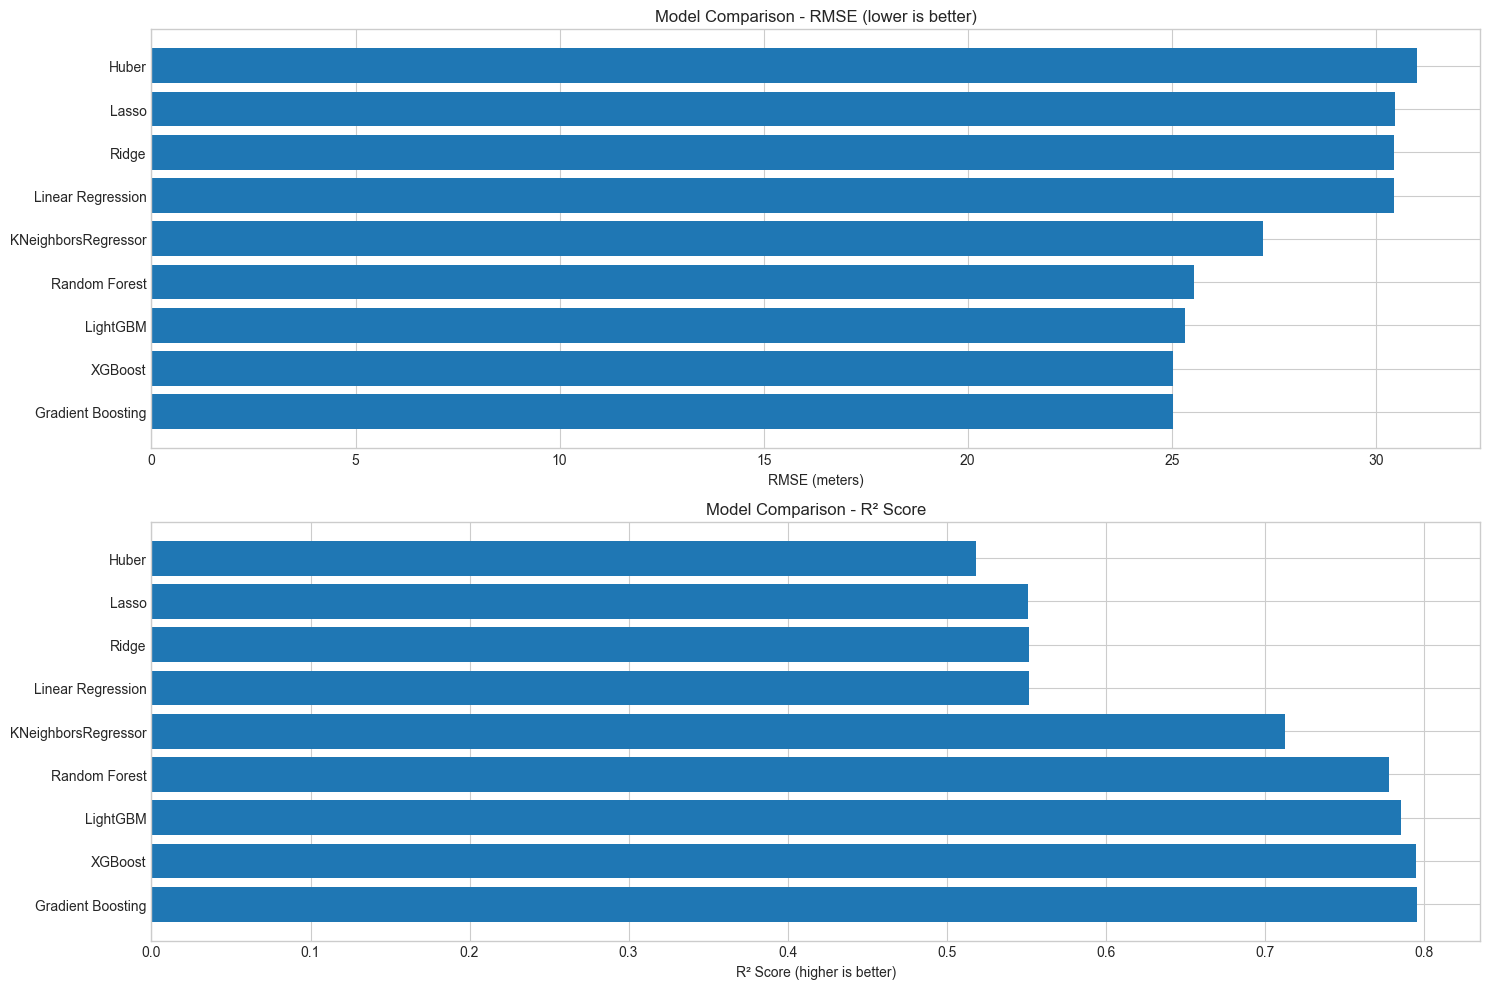

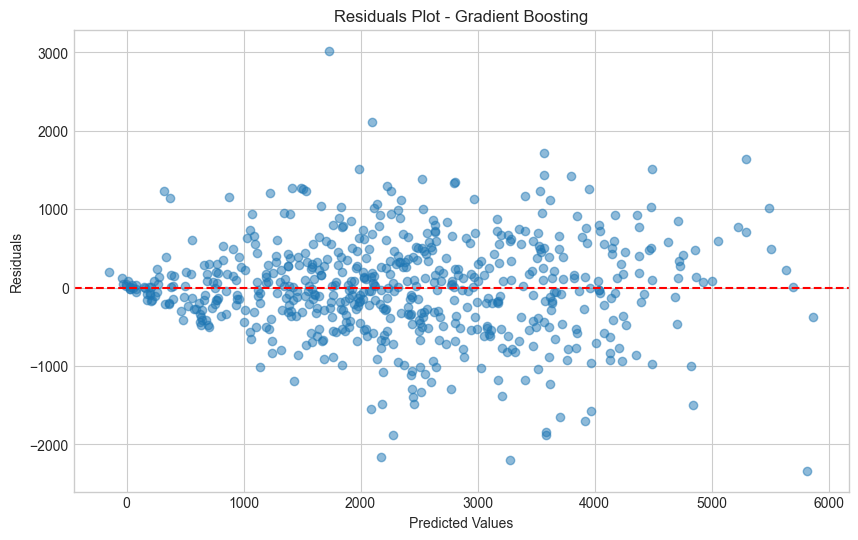


Summary of all models:
                          RMSE        R²      CV RMSE  CV RMSE Std
Gradient Boosting    25.019725  0.795659   690.766349    54.528578
XGBoost              25.028452  0.795373   684.997751    57.843378
LightGBM             25.317765  0.785747   694.106721    58.188870
Random Forest        25.533799  0.778340   708.025074    55.824485
KNeighborsRegressor  27.234575  0.713115   811.033516    76.629624
Linear Regression    30.450959  0.551637  1070.512696   243.870249
Ridge                30.451659  0.551595  1068.760742   241.741509
Lasso                30.456864  0.551289  1064.869688   235.626034
Huber                31.000232  0.518401  1052.946208   303.058147
Visualizations for the best model:


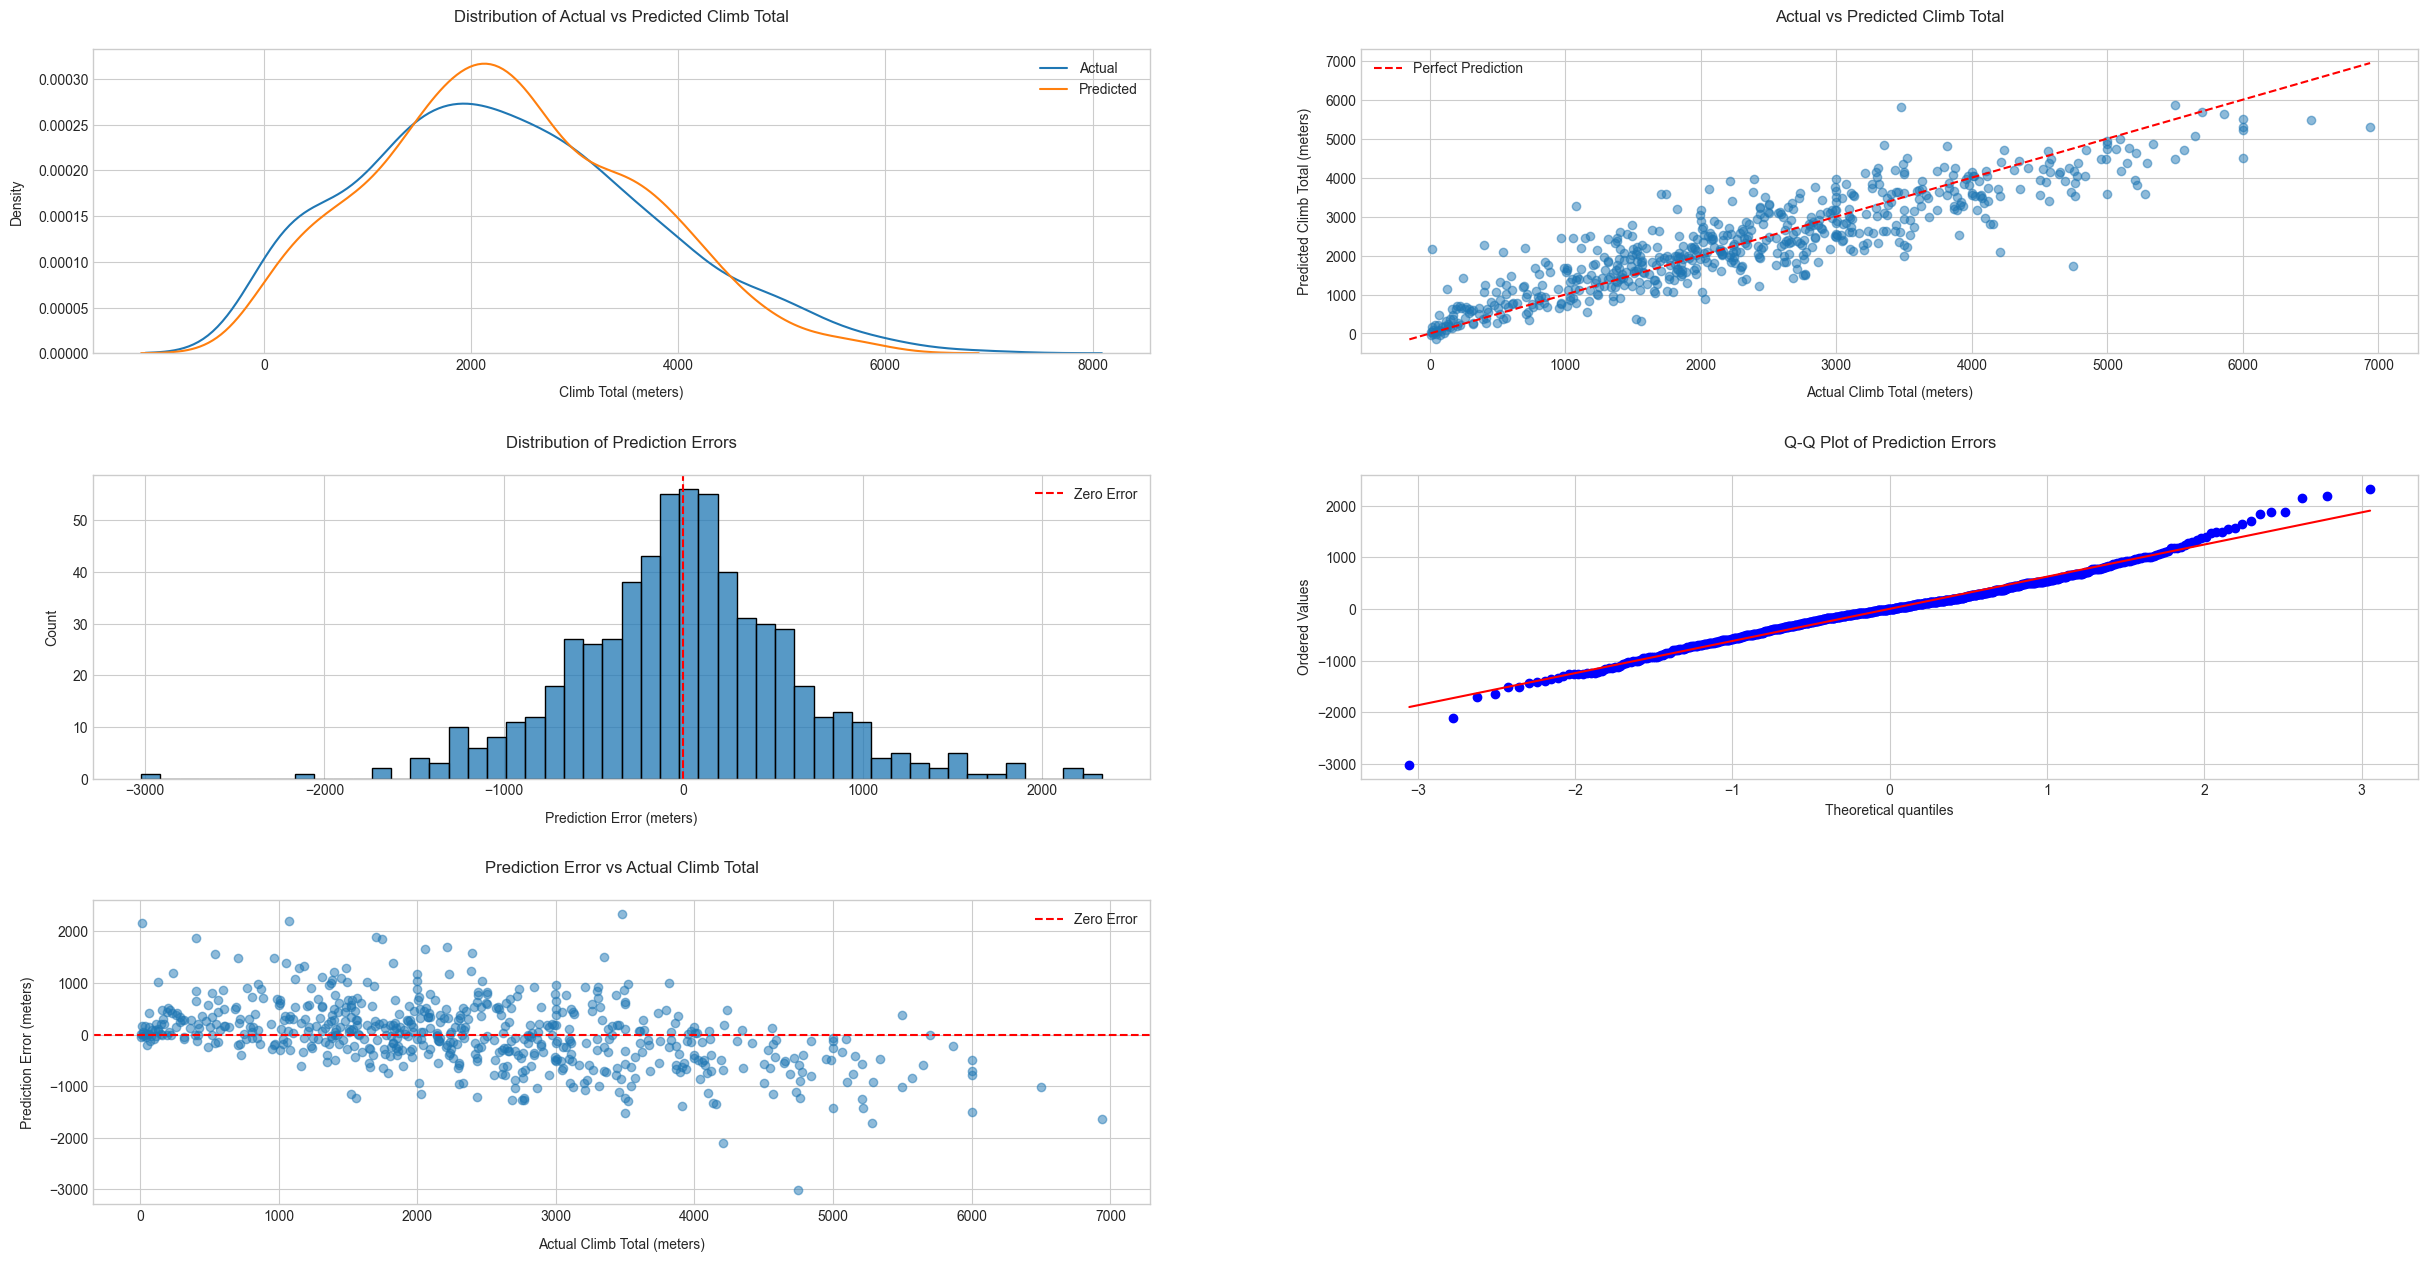

In [147]:


def compare_algorithms(races_agg, features):
    """
    Compare different algorithms for predicting climb_total values.
    
    Parameters:
    races_agg (pd.DataFrame): Input DataFrame
    features (list): List of feature columns to use
    
    Returns:
    dict: Dictionary containing trained models and their performance metrics
    """
    # Prepare data
    known_mask = ~races_agg['climb_total'].isna()
    train_data = races_agg[known_mask]
    predict_data = races_agg[~known_mask]
    
    X = train_data[features.keys()].copy()
    X_to_pred = predict_data[features.keys()].copy()
    y = train_data['climb_total']

    for feature, info in features.items():
        if feature not in X.columns:
            raise ValueError(f"Feature '{feature}' not found in DataFrame")
        
        if info['type'] not in ['numeric', 'categorical', 'boolean']:
            raise ValueError(f"Unknown feature type: {info['type']}")

        
    
   
    
    # Handle missing values
    
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    
    # Define models to compare
    model_params = {
        'Random Forest': {
            'model': RandomForestRegressor(n_jobs=-1),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [5, 10, 15, 20, None],
                'min_samples_split': [2, 5, 10, 15],
                'min_samples_leaf': [1, 2, 4, 5],
                'max_features': ['sqrt', 'log2', None]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7, 9],
                'subsample': [0.8, 0.9, 1.0],
                'min_samples_split': [2, 5, 10]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        'LightGBM': {
            'model': LGBMRegressor(verbose=-1),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'num_leaves': [10, 20, 31],
                'subsample': [0.9, 1.0]
            }
        },
        'Huber': {
            'model': HuberRegressor(),
            'params': {
                'epsilon': [1.1, 1.35, 1.5],
                'alpha': [0.0001, 0.001, 0.01],
                'max_iter': [100, 200, 300]
            }
        },
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 2.0]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 2.0]
            }
        },
        'KNeighborsRegressor': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
    }

    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model_info in model_params.items():
        print(f"\nTraining {name}...")

        pipeline = Pipeline([
            ('regressor', model_info['model'])
        ])

        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions={'regressor__' + key: value for key, value in model_info['params'].items()},
            n_iter=40,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
        )
        
        # Train model
        random_search.fit(X_train, y_train)

        model = random_search.best_estimator_
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mse(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(
            model, X, y, 
            cv=5, scoring='neg_root_mean_squared_error'
        )
        
        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'best_params': random_search.best_params_,
            'cv_rmse': -cv_scores.mean(),
            'cv_rmse_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"{name} Results:")
        print(f"RMSE: {rmse:.2f} meters")
        print(f"R²: {r2:.3f}")
        print(f"CV RMSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f} meters")
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Plot RMSE comparison
    plt.subplot(2, 1, 1)
    rmse_scores = [(name, results[name]['rmse']) for name in results.keys()]
    rmse_scores.sort(key=lambda x: x[1])
    
    names, scores = zip(*rmse_scores)
    plt.barh(names, scores)
    plt.xlabel('RMSE (meters)')
    plt.title('Model Comparison - RMSE (lower is better)')
    
    # Plot R² comparison
    plt.subplot(2, 1, 2)
    r2_scores = [(name, results[name]['r2']) for name in results.keys()]
    r2_scores.sort(key=lambda x: x[1], reverse=True)
    
    names, scores = zip(*r2_scores)
    plt.barh(names, scores)
    plt.xlabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² Score')
    
    plt.tight_layout()
    plt.show()
    
    # Plot residuals for best model
    best_model_name = min(results.keys(), key=lambda k: results[k]['rmse'])
    best_predictions = results[best_model_name]['predictions']
    
    plt.figure(figsize=(10, 6))
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot - {best_model_name}')
    plt.show()
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'RMSE': [results[name]['rmse'] for name in results.keys()],
        'R²': [results[name]['r2'] for name in results.keys()],
        'CV RMSE': [results[name]['cv_rmse'] for name in results.keys()],
        'CV RMSE Std': [results[name]['cv_rmse_std'] for name in results.keys()]
    }, index=results.keys())
    
    print("\nSummary of all models:")
    print(summary.sort_values('RMSE'))

    climb_total_predictions = pd.Series(results[best_model_name]['model'].predict(X_to_pred), index=predict_data.index)

    print("Visualizations for the best model:")
    errors_visualization(y_test, best_predictions)
    
    return  results, summary, climb_total_predictions

segmentation_features = {
    'length': {'type': 'numeric'},
    'points': {'type': 'numeric'},
    'startlist_quality': {'type': 'numeric'},
    'is_tarmac': {'type': 'boolean'},
    'profile': {'type': 'categorical'},
        
}

# compare_algorithms(races, features=segmentation_features)

results, summary, climb_total_pred = compare_algorithms(races_agg, features=pred_features)

# Use the best model to make predictions
best_model_name = summary.index[0]
best_model = results[best_model_name]['model']


### Model Performance Comparison

**Gradient Boosting** performed best overall, with:

- **Lowest RMSE**: 25.02 meters
- **Highest R² score**: 0.796 (approximately 80% of variance explained)
- **Most consistent cross-validation scores** (CV RMSE Std: 54.53)

The performance ranking from best to worst based on RMSE and R² is:

1. Gradient Boosting
2. XGBoost (very close second)
3. LightGBM
4. Random Forest
5. KNeighborsRegressor
6. Linear Regression/Ridge/Lasso
7. Huber

### Residuals Analysis (from the Gradient Boosting model)

The residuals plot shows:

- Relatively symmetric distribution around zero
- Some heteroscedasticity (variance increases with predicted values)
- A few outliers, particularly in the higher prediction ranges
- Most residuals fall within ±1000 meters

### Distribution and Prediction Analysis

The distribution plot shows:

- Good alignment between actual and predicted distributions
- Slight overestimation around the peak (2000 meters)
- Both distributions are right-skewed

The actual vs predicted scatter plot reveals:

- Strong linear relationship
- More scatter at higher values
- Generally good prediction accuracy
- Some underprediction for very high values (>5000 meters)

### Error Distribution

The prediction errors:

- Are approximately normally distributed
- Centered around zero
- Have a slight negative skew
- Most errors fall within ±1000 meters

The Q-Q plot confirms:

- Generally normal distribution of errors
- Some deviation at the tails
- Slight heavy-tailed behavior

### Key Takeaways

- Tree-based ensemble methods (Gradient Boosting, XGBoost, LightGBM) significantly outperform simpler models.
- The model performs well for typical cases but has reduced accuracy for extreme values.
- The predictions are unbiased (centered around zero) but show increasing variance for larger values.
- The model explains about 80% of the variance in climb totals, which is quite good for what appears to be a complex prediction task.

In [148]:
climb_total_pred

_url                            name                              
amstel-gold-race/1970/result    Amstel Gold Race                      3828.936611
amstel-gold-race/1971/result    Amstel Gold Race                      3823.821036
amstel-gold-race/1972/result    Amstel Gold Race                      4593.020935
amstel-gold-race/1973/result    Amstel Gold Race                      4216.066170
amstel-gold-race/1974/result    Amstel Gold Race                      4364.471728
                                                                         ...     
world-championship/1984/result  World Championships - Road Race       3984.259722
world-championship/1989/result  World Championships - Road Race       3689.772390
world-championship/1990/result  World Championships - Road Race       3965.575617
world-championship/1992/result  World Championships - Road Race       4444.212193
world-championship/2017/result  World Championships ME - Road Race    2967.021184
Length: 2214, dtype: float64


This code performs the following tasks:

1. **Imports and Setup**:
    - Imports the `warnings` module and configures `tqdm` for progress bars.

2. **Function Definitions**:
    - `fit_best_distribution(data)`: Fits multiple probability distributions to the input data and returns the best fitting distribution based on a scoring mechanism.
    - `find_optimal_clusters(data, max_k)`: Uses the Elbow method to find the optimal number of clusters for K-means clustering.
    - `silhouette_method(data, max_k)`: Uses the Silhouette method to find the optimal number of clusters for K-means clustering.
    - `predict_feature(df, segmentation_features, feature_to_predict)`: Predicts missing values for a specified feature using data segmentation and multiple probability distributions.

3. **Data Preparation and Segmentation**:
    - Prepares the data by converting dates and creating feature matrices.
    - Uses K-means clustering to segment the data into clusters.
    - Creates segments based on various features like length, road type, season, and quality level.

4. **Distribution Fitting and Prediction**:
    - Fits probability distributions to each segment and predicts missing values for the specified feature.
    - Calculates prediction confidence based on the fitted distributions.

5. **Evaluation**:
    - Evaluates the predictions by calculating metrics such as RMSE, R², MAE, and MSE.
    - Prints feature importance and sample predictions by segment.

6. **Example Usage**:
    - Demonstrates the usage of the `predict_feature` function on a test dataset, evaluates the predictions, and prints the results.


 Feature statistics before imputation:
length: 0 missing (0.00%)
points: 0 missing (0.00%)
startlist_quality: 0 missing (0.00%)
is_tarmac: 0 missing (0.00%)
profile: 0 missing (0.00%)
position: 0 missing (0.00%)
cyclist_age: 0 missing (0.00%)
adjusted_delta: 0 missing (0.00%)
startlist_score_per_km: 0 missing (0.00%)
uci_points: 0 missing (0.00%)
season: 0 missing (0.00%)
team_present: 0 missing (0.00%)


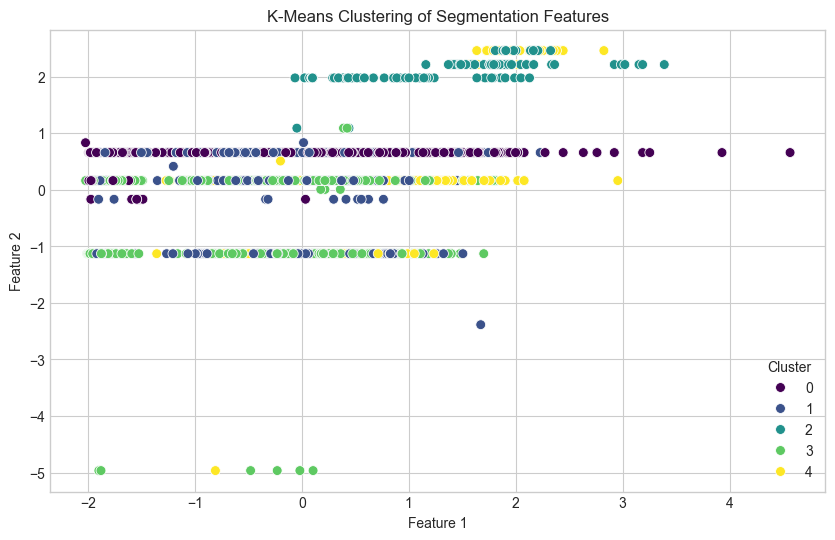

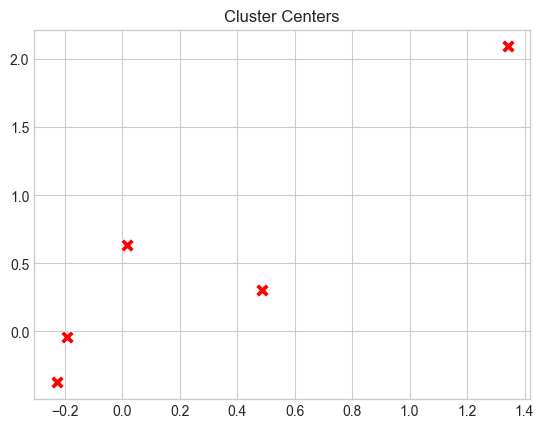

number of segments: 108


100%|██████████| 3067/3067 [00:00<00:00, 146554.07it/s]

Feature importance:
{'length': np.float64(0.430245387616503), 'points': np.float64(0.10917070820289516), 'startlist_quality': np.float64(0.03022691052625143), 'is_tarmac': np.float64(0.11378072922314765), 'profile': np.float64(0.43753581932737745), 'position': np.float64(0.09440689610533283), 'cyclist_age': np.float64(0.000502519415226394), 'adjusted_delta': np.float64(0.13725298392939575), 'startlist_score_per_km': np.float64(0.3699806633016973), 'uci_points': np.float64(0.06011750181700444), 'season': np.float64(0.04305958059170366), 'team_present': np.float64(0.011791936006714326)}

Sample predictions by segment:
                   climb_total_predicted       prediction_confidence
                                    mean count                  mean
segment                                                             
L_M_Fall_Low_C2              2384.422111     9                   0.0
L_M_Spring_High_C2           2386.428257     4                   0.0
L_M_Spring_Low_C2            20

In [166]:
import warnings

# Treat all warnings as errors
# warnings.simplefilter("warning")
tqdm.pandas()  # Enable progress_apply


def fit_best_distribution(data):
    """
    Try multiple distributions and return the best fitting one
    
    Parameters:
    data (array-like): Data to fit distributions to
    
    Returns:
    tuple: (distribution name, distribution parameters, fit score)
    """
    orig_mean = data.mean()
    orig_std = data.std()
    orig_skew = stats.skew(data)
    orig_kurtosis = stats.kurtosis(data)

    kde = stats.gaussian_kde(data)
    distributions = [
        ('gamma', stats.gamma),
        ('lognorm', stats.lognorm),
        ('weibull_min', stats.weibull_min),
        ('beta', stats.beta),
        ('burr', stats.burr),
        ('burr12', stats.burr12),
        ('gaussian_mix', lambda x: stats.norm(loc=orig_mean, scale=orig_std))
    ]
    
    best_fit = None
    best_score = float('inf')
    
    if len(data) < 20 or data.std() == 0:
        return None
    
    
    
    for name, distribution in distributions:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                if name == 'beta':
                    data_normalized = (data - data.min()) / (data.max() - data.min())
                    data_normalized = np.clip(data_normalized, 1e-6, 1 - 1e-6)
                    params = distribution.fit(data_normalized)
                    ks_stat, _ = kstest(data_normalized, name, params)
                    samples = distribution.rvs(*params, size=1000)
                    samples = samples * (data.max() - data.min()) + data.min() 
                else:
                    params = distribution.fit(data)
                    ks_stat, _ = kstest(data, name, params)
                    samples = distribution.rvs(*params, size=1000)

                
                moment_score = (
                    abs(orig_mean - np.mean(samples)) / orig_std +
                    abs(orig_std - np.std(samples)) / orig_std +
                    abs(orig_skew - stats.skew(samples)) +
                    abs(orig_kurtosis - stats.kurtosis(samples))
                )

                weight_ks = 3.5  # KS statistic weight
                weight_moment = 0.5  # Moment score weight
                weight_density = 0.2  # Density score weight

                x_eval = np.linspace(data.min(), data.max(), 1000)
                kde_orig = kde(x_eval)
                kde_fitted = stats.gaussian_kde(samples)(x_eval)
                density_score = np.mean(np.abs(kde_orig - kde_fitted))

                total_score = (weight_ks * ks_stat) + (weight_moment * moment_score) + (weight_density * density_score)
                
                if total_score < best_score:
                    best_fit = (name, params, total_score)
                    best_score = ks_stat
                    
        except Exception as e:
            continue
    
    return best_fit



def find_optimal_clusters(data, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    # Plot inertia vs. number of clusters
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.show()

def silhouette_method(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):  # Silhouette requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    # Plot silhouette score vs. number of clusters
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


def predict_feature(df, segmentation_features, feature_to_predict):
    """
    Predict missing a specific feature nan values using data segmentation and multiple probability distributions
    
    Parameters:
    races_df (pd.DataFrame): The input races dataframe
    
    Returns:
    pd.DataFrame: DataFrame with predicted feature to predict values and fit information
    """
    
 
    missing_features = [k for k,v in segmentation_features.items() if k not in df.columns]
    

    if missing_features:
        raise ValueError(f"Features {missing_features} are missing in the input DataFrame")
        
    
    

    
    # 1. Feature preparation
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    
    print("\n Feature statistics before imputation:")
    for feature in segmentation_features:
        missing = df[feature].isna().sum()
        total = len(df[feature])
        print(f"{feature}: {missing} missing ({missing/total:.2%})")
    
    # 2. Create feature matrix for segmentation
    feature_matrix = df[segmentation_features.keys()].to_numpy()
    
    if np.isnan(feature_matrix).any():
        raise ValueError("NaN values found in feature matrix")
    
    # 3. Use K-means clustering for sophisticated segmentation
    n_clusters = min(20, len(df) // 1000)+10  # Adaptive number of clusters
    # find_optimal_clusters(feature_matrix, n_clusters)
    # silhouette_method(feature_matrix, n_clusters)
    n_clusters = 5  # Chosen based on elbow and silhouette methods
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['segment_cluster'] = kmeans.fit_predict(feature_matrix)
    
    # plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature_matrix[:, 0], y=feature_matrix[:, 1], hue=df['segment_cluster'], s=50, palette='viridis')
    plt.title('K-Means Clustering of Segmentation Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster')
    plt.show()
    plt.close()

    centers = kmeans.cluster_centers_

    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=100, color='red', marker='X')
    plt.title('Cluster Centers')
    plt.show()
    plt.close()

    
    
    # 4. Create segments
    df['length_category'] = pd.qcut(df['length'], q=5, labels=['VS', 'S', 'M', 'L', 'VL'])
    df['road_type'] = np.where(df['is_tarmac'], 'T', 'M')
    df['season'] = pd.cut(df['month'], bins=[0, 4, 8, 12], labels=['Spring', 'Summer', 'Fall'])
    
    if 'startlist_quality' in df.columns:
        df['quality_level'] = np.where(
            df['startlist_quality'] > df['startlist_quality'].median(), 
            'High', 
            'Low'
        )
    else:
        df['quality_level'] = 'Medium'
    
    # Create segment ID efficiently
    df['segment'] = (df['length_category'].astype(str) + '_' + 
                    df['road_type'].astype(str) + '_' + 
                    df['season'].astype(str) + '_' + 
                    df['quality_level'].astype(str) + '_C' + 
                    df['segment_cluster'].astype(str))
     
    print(f"number of segments: {len(df['segment'].unique())}")
    # 5. Calculate distributions for each segment
    segment_distributions = {}
    distribution_info = {}
    
    for segment in tqdm(df['segment'].unique(), desc="Fitting Distributions"):
        segment_data = df[df['segment'] == segment][feature_to_predict].dropna()
        if len(segment_data) > 20:
            best_fit = fit_best_distribution(segment_data)

            if best_fit is not None:
                dist_name, params, ks_score = best_fit
                segment_distributions[segment] = (dist_name, params)
                distribution_info[segment] = {
                    'distribution': dist_name,
                    'ks_score': ks_score,
                    'sample_size': len(segment_data),
                    'feature_means': {
                        feature: df[df['segment'] == segment][feature].mean()
                        for feature in segmentation_features if feature in df.columns and pd.api.types.is_numeric_dtype(df[feature])
                    }
                }
            else:
                distribution_info[segment] = {
                    'distribution': 'none',
                    'ks_score': 1.0,
                    'sample_size': len(segment_data),
                    'feature_means': {
                        feature: df[df['segment'] == segment][feature].mean()
                        for feature in segmentation_features if feature in df.columns and pd.api.types.is_numeric_dtype(df[feature])
                    }
                }
    
    # 6. Predict missing values
    def predict_climb(row, df, segment_distributions, distribution_info, segmentation_features, feature_matrix):
        valid_data = df[feature_to_predict].dropna()
        data_mean = valid_data.mean()
        data_std = valid_data.std()
        min_valid = max(0, data_mean - 3 * data_std)
        max_valid = data_mean + 3 * data_std
        if pd.isna(row[feature_to_predict]):
            segment = row['segment']

            

            if segment in segment_distributions:
                try:
                    dist_name, params = segment_distributions[segment]
                    distribution = getattr(stats, dist_name)

                    with np.errstate(all='ignore'):  # Suppress numpy warnings
                        if dist_name == 'beta':
                            segment_data = df[df['segment'] == segment][feature_to_predict].dropna()
                            min_val, max_val = segment_data.min(), segment_data.max()
                            samples = distribution.rvs(*params, size=1000)
                            prediction = np.median(samples) * (max_val - min_val) + min_val
                        else:
                            try:
                                samples = distribution.rvs(*params, size=1000)
                                prediction = np.mean(samples)
                            except:
                                prediction = distribution.mean(*params)
                            prediction = np.random.normal(0, data_std * 0.005)
                        if np.isnan(prediction) or np.isinf(prediction) or prediction < min_valid or prediction > max_valid:
                            segment_stats = df[df['segment'] == segment][feature_to_predict]
                            if len(segment_stats) > 0:
                                prediction = segment_stats.mean() + np.random.normal(0, segment_stats.std() * 0.005)
                            else:
                                prediction = data_mean + np.random.normal(0, data_std * 0.005)

                    

                    return np.clip(prediction, min_valid, max_valid)
                except:
                    return df[feature_to_predict].mean()
            try:
                # If no exact segment, use cosine similarity to find similar segments
                segment_idx = list(df['segment'].unique()).index(segment)
                segment_features = feature_matrix[segment_idx].reshape(1, -1)
                
                valid_segments = [s for s in segment_distributions.keys() 
                                if s in distribution_info]
                
                if not valid_segments:
                    return df[feature_to_predict].mean()
                
                segment_means = np.array([
                    [distribution_info[s]['feature_means'].get(f, 0) 
                     for f in segmentation_features]
                    for s in valid_segments
                ])

                
                similarities = cosine_similarity(segment_features, segment_means).flatten()
                top_segments = np.argsort(similarities)[-3:]  # Top 3 most similar segments
                
                predictions = []
                for idx in top_segments:
                    seg = valid_segments[idx]
                    dist_name, params = segment_distributions[seg]
                    distribution = getattr(stats, dist_name)
                    
                    with warnings.catch_warnings():
                        warnings.filterwarnings('ignore')
                        pred = distribution.mean(*params)
                        
                    if not (np.isnan(pred) or np.isinf(pred)) and min_valid <= pred <= max_valid:
                        predictions.append(pred)
                
                if predictions:
                    return np.mean(predictions) + np.random.normal(0, data_std * 0.005)
            except Exception as e:
                pass

        
        return data_mean + np.random.normal(0, data_std * 0.005)
    
    # Adding a progress bar to the prediction step
    df[f'{feature_to_predict}_predicted'] = df.progress_apply(
         lambda row: predict_climb(row, df, segment_distributions, distribution_info, 
                                segmentation_features, feature_matrix), 
        axis=1
    )

    predicted_values = df[f'{feature_to_predict}_predicted'].values
    kde = stats.gaussian_kde(predicted_values)
    smoothed_predictions = kde.resample(len(predicted_values))[0]
    rank_order = predicted_values.argsort()
    smoothed_sorted = np.sort(smoothed_predictions)
    df[f"{feature_to_predict}_predicted"] = smoothed_sorted[np.argsort(rank_order)]

    # 7. Calculate prediction confidence
    def calculate_confidence(row):
        segment = row['segment']
        if segment in distribution_info:
            info = distribution_info[segment]
            ks_confidence = 1 / (1 + info['ks_score'])
            sample_confidence = min(1, info['sample_size'] / 100)
            feature_similarity = np.mean([info['feature_means'].get(f, 0) for f in segmentation_features])
            return (ks_confidence + sample_confidence + feature_similarity) / 3
        return 0
    
    df['prediction_confidence'] = df.progress_apply(calculate_confidence, axis=1)
    # df['segment'].map(lambda x: print(x) if distribution_info.get(x, {}) == {} else None)
    df['distribution_used'] = df['segment'].map(lambda x: distribution_info.get(x, {}).get('distribution', 'none'))
    
    # 8. Create summary statistics
    summary_stats = {
        'total_missing': df[feature_to_predict].isna().sum(),
        'segments_created': len(df['segment'].unique()),
        'segments_with_distribution': len(segment_distributions),
        'distribution_usage': pd.Series([info['distribution'] for info in distribution_info.values()]).value_counts().to_dict(),
        'mean_confidence': df['prediction_confidence'].mean(),
        'median_predicted_climb': df[f'{feature_to_predict}_predicted'].median(),
        'features_used': segmentation_features,
        'feature_importance': {
            feature: abs(np.corrcoef(feature_matrix[:, i], 
                                   df[feature_to_predict].fillna(df[feature_to_predict].mean()))[0, 1])
            for i, feature in enumerate(segmentation_features)
        }
    }
    
    return df[[feature_to_predict, f'{feature_to_predict}_predicted', 'prediction_confidence', 
              'segment', 'distribution_used']], summary_stats

    

df_test = races_agg[races_agg['climb_total'].notna()].copy()
random_indices = df_test.sample(frac=0.2).index
y_test = df_test.loc[random_indices, 'climb_total']
df_test.loc[random_indices, 'climb_total'] = np.nan

predictions, stats_races = predict_feature(
    df_test, segmentation_features=pred_features, feature_to_predict='climb_total'
)



# View feature importance
print("Feature importance:")
print(stats_races['feature_importance'])

# View segments and their predictions
print("\nSample predictions by segment:")
predictions_summary = predictions.groupby('segment').agg({
    'climb_total_predicted': ['mean', 'count'],
    'prediction_confidence': 'mean'
}).head()
print(predictions_summary)

print("\nMetrics:")
mse_score = mse(y_test, predictions['climb_total_predicted'].loc[y_test.index])
r2 = r2_score(y_test, predictions['climb_total_predicted'].loc[y_test.index])
rmse = np.sqrt(mse_score)
mae = np.mean(np.abs(y_test - predictions['climb_total_predicted'].loc[y_test.index]))
print(f"RMSE: {rmse:.2f} meters")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f} meters")
print(f"MSE: {mse_score:.2f}")


del df_test

### Explanation of Visualization Code

The following code performs the following tasks:

1. **Assigns True Values to Predictions**:
    - The `climb_total` values for the randomly selected indices are assigned back to the `predictions` DataFrame.

2. **Creates Prediction Visualizations**:
    - The `create_prediction_visualizations` function is called to generate various visualizations for the `climb_total` predictions. This includes distribution plots, scatter plots, and error analysis.

3. **Creates Segment Analysis**:
    - The `create_segment_analysis` function is called to generate visualizations for segment analysis. This includes segment size distribution, confidence distribution, and prediction range by segment.

4. **Interactive Analysis**:
    - The commented-out `%matplotlib inline` and `plot_interactive_analysis` lines indicate that the code can be used for interactive analysis within a Jupyter notebook. Uncommenting these lines would enable inline plotting and interactive analysis of the predictions.


Length true data: 613
Length predicted data: 613
Mean true data: 2301.9869494290374
Mean predicted data: 1319.57016926435
STD of true data: 1423.0372056690203
STD of predicted data: 1327.1426413937268


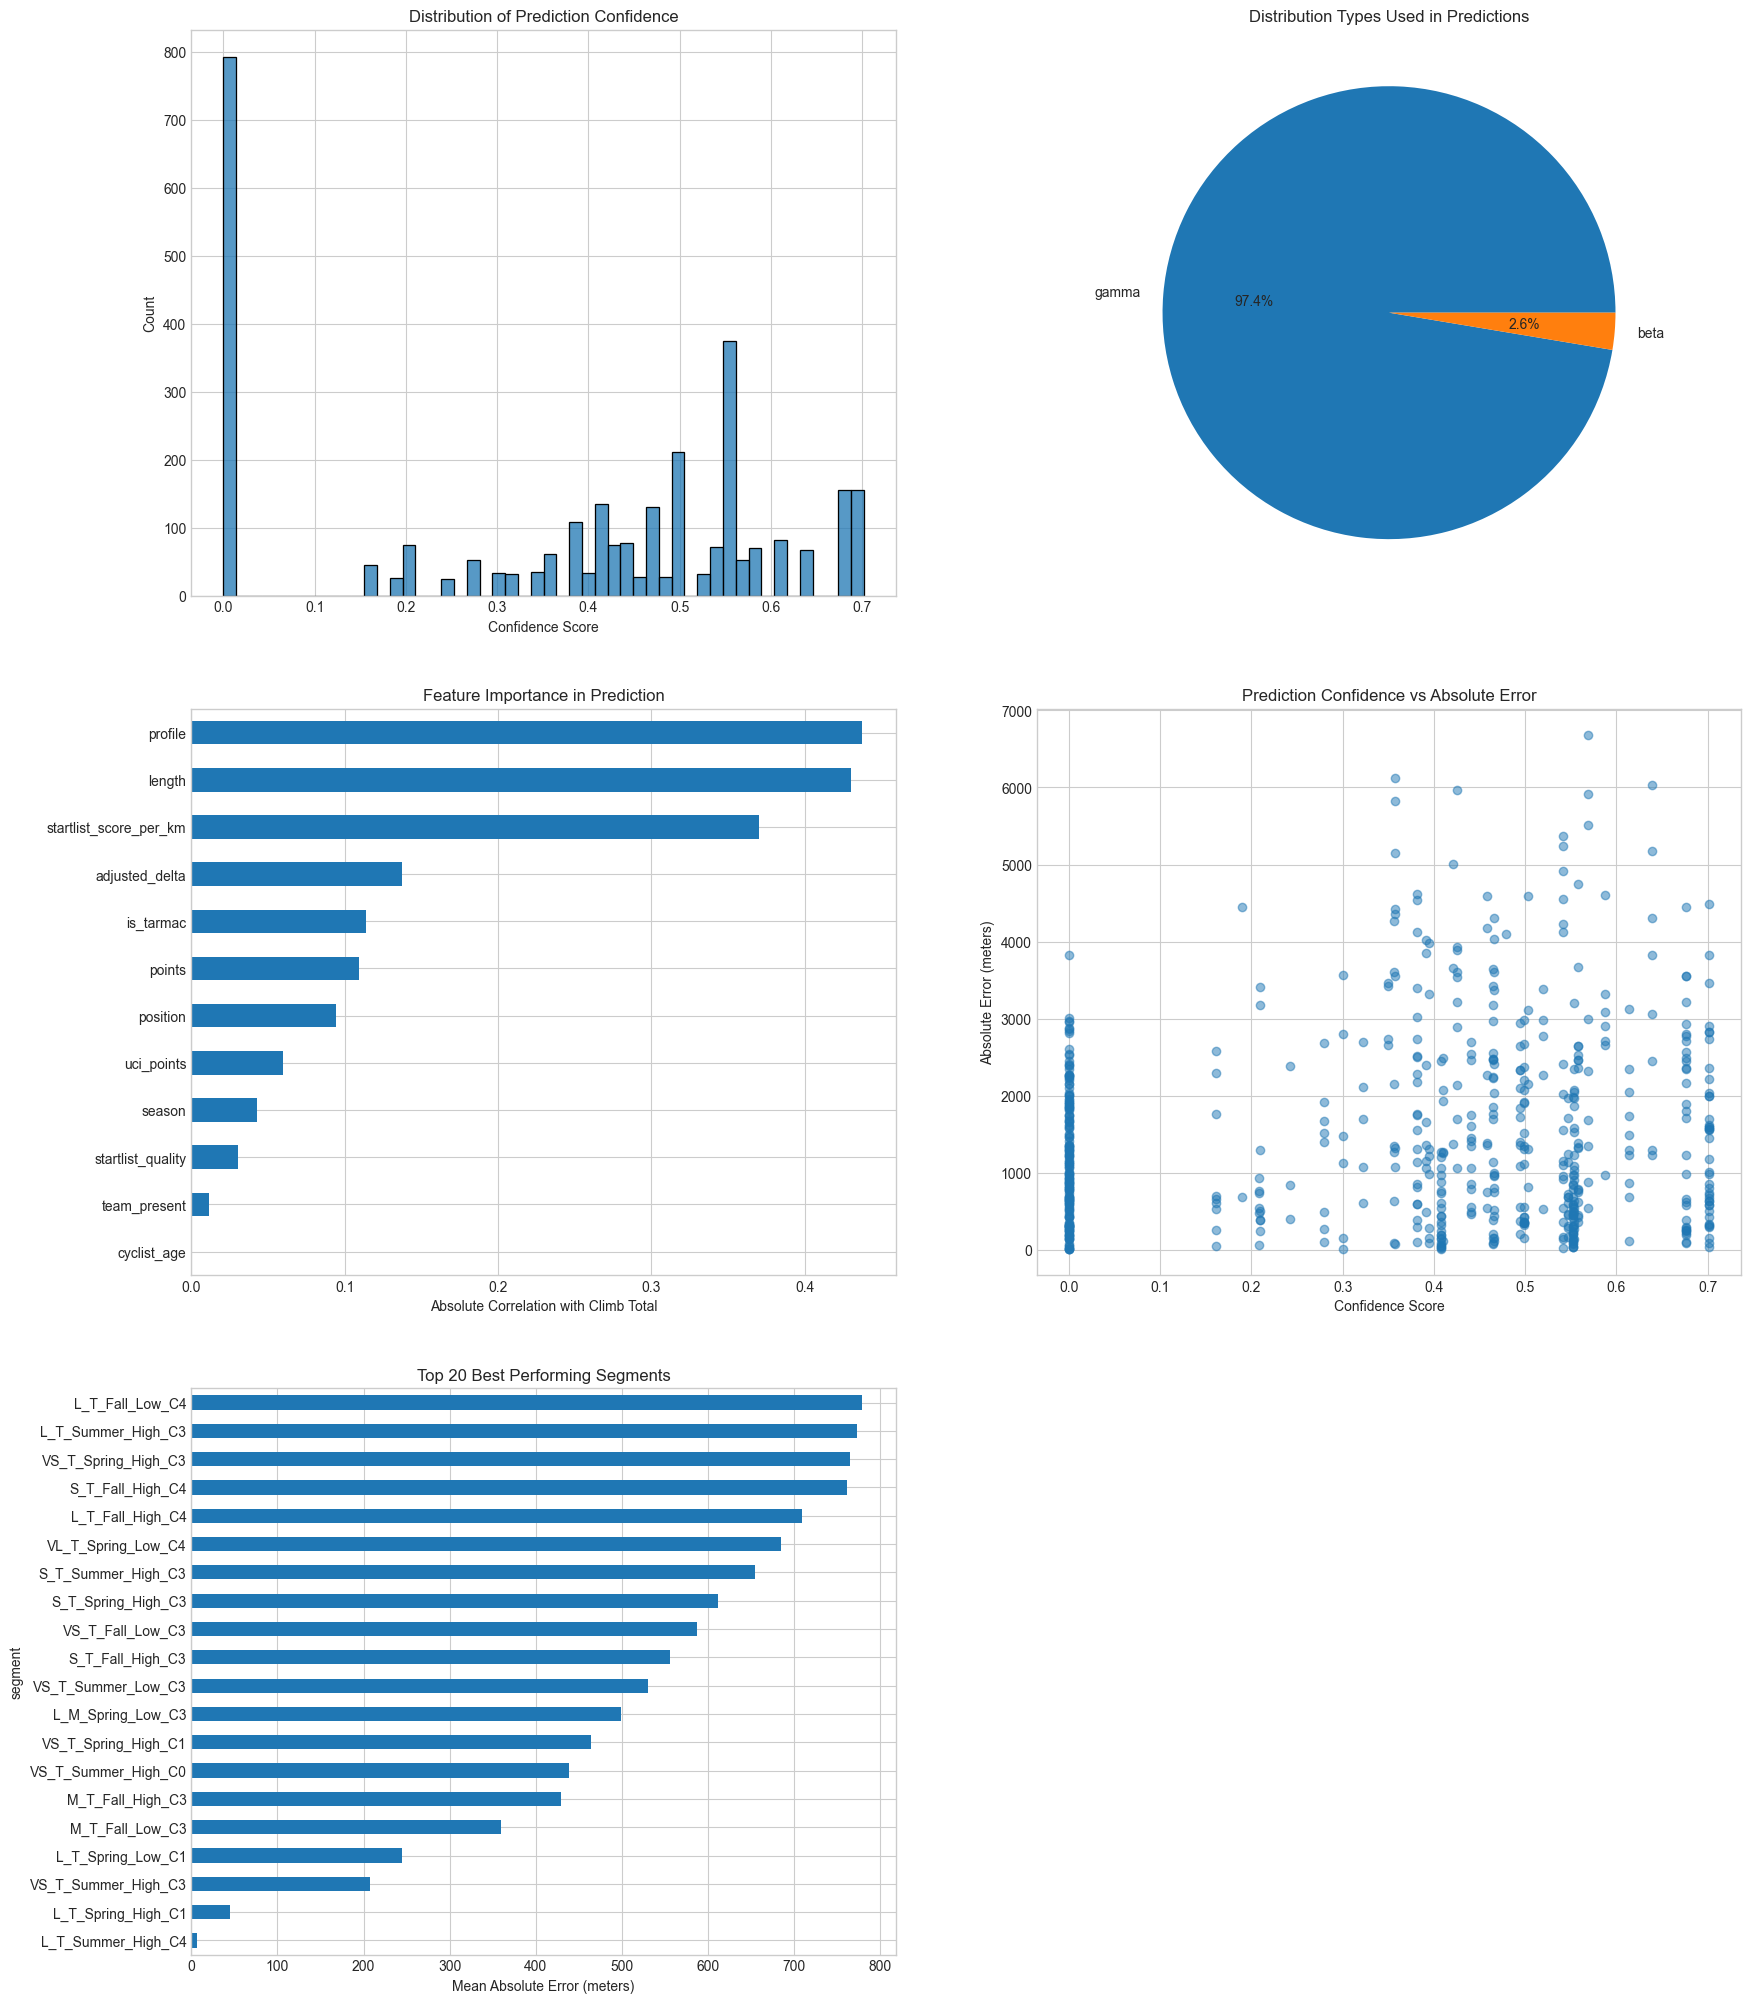

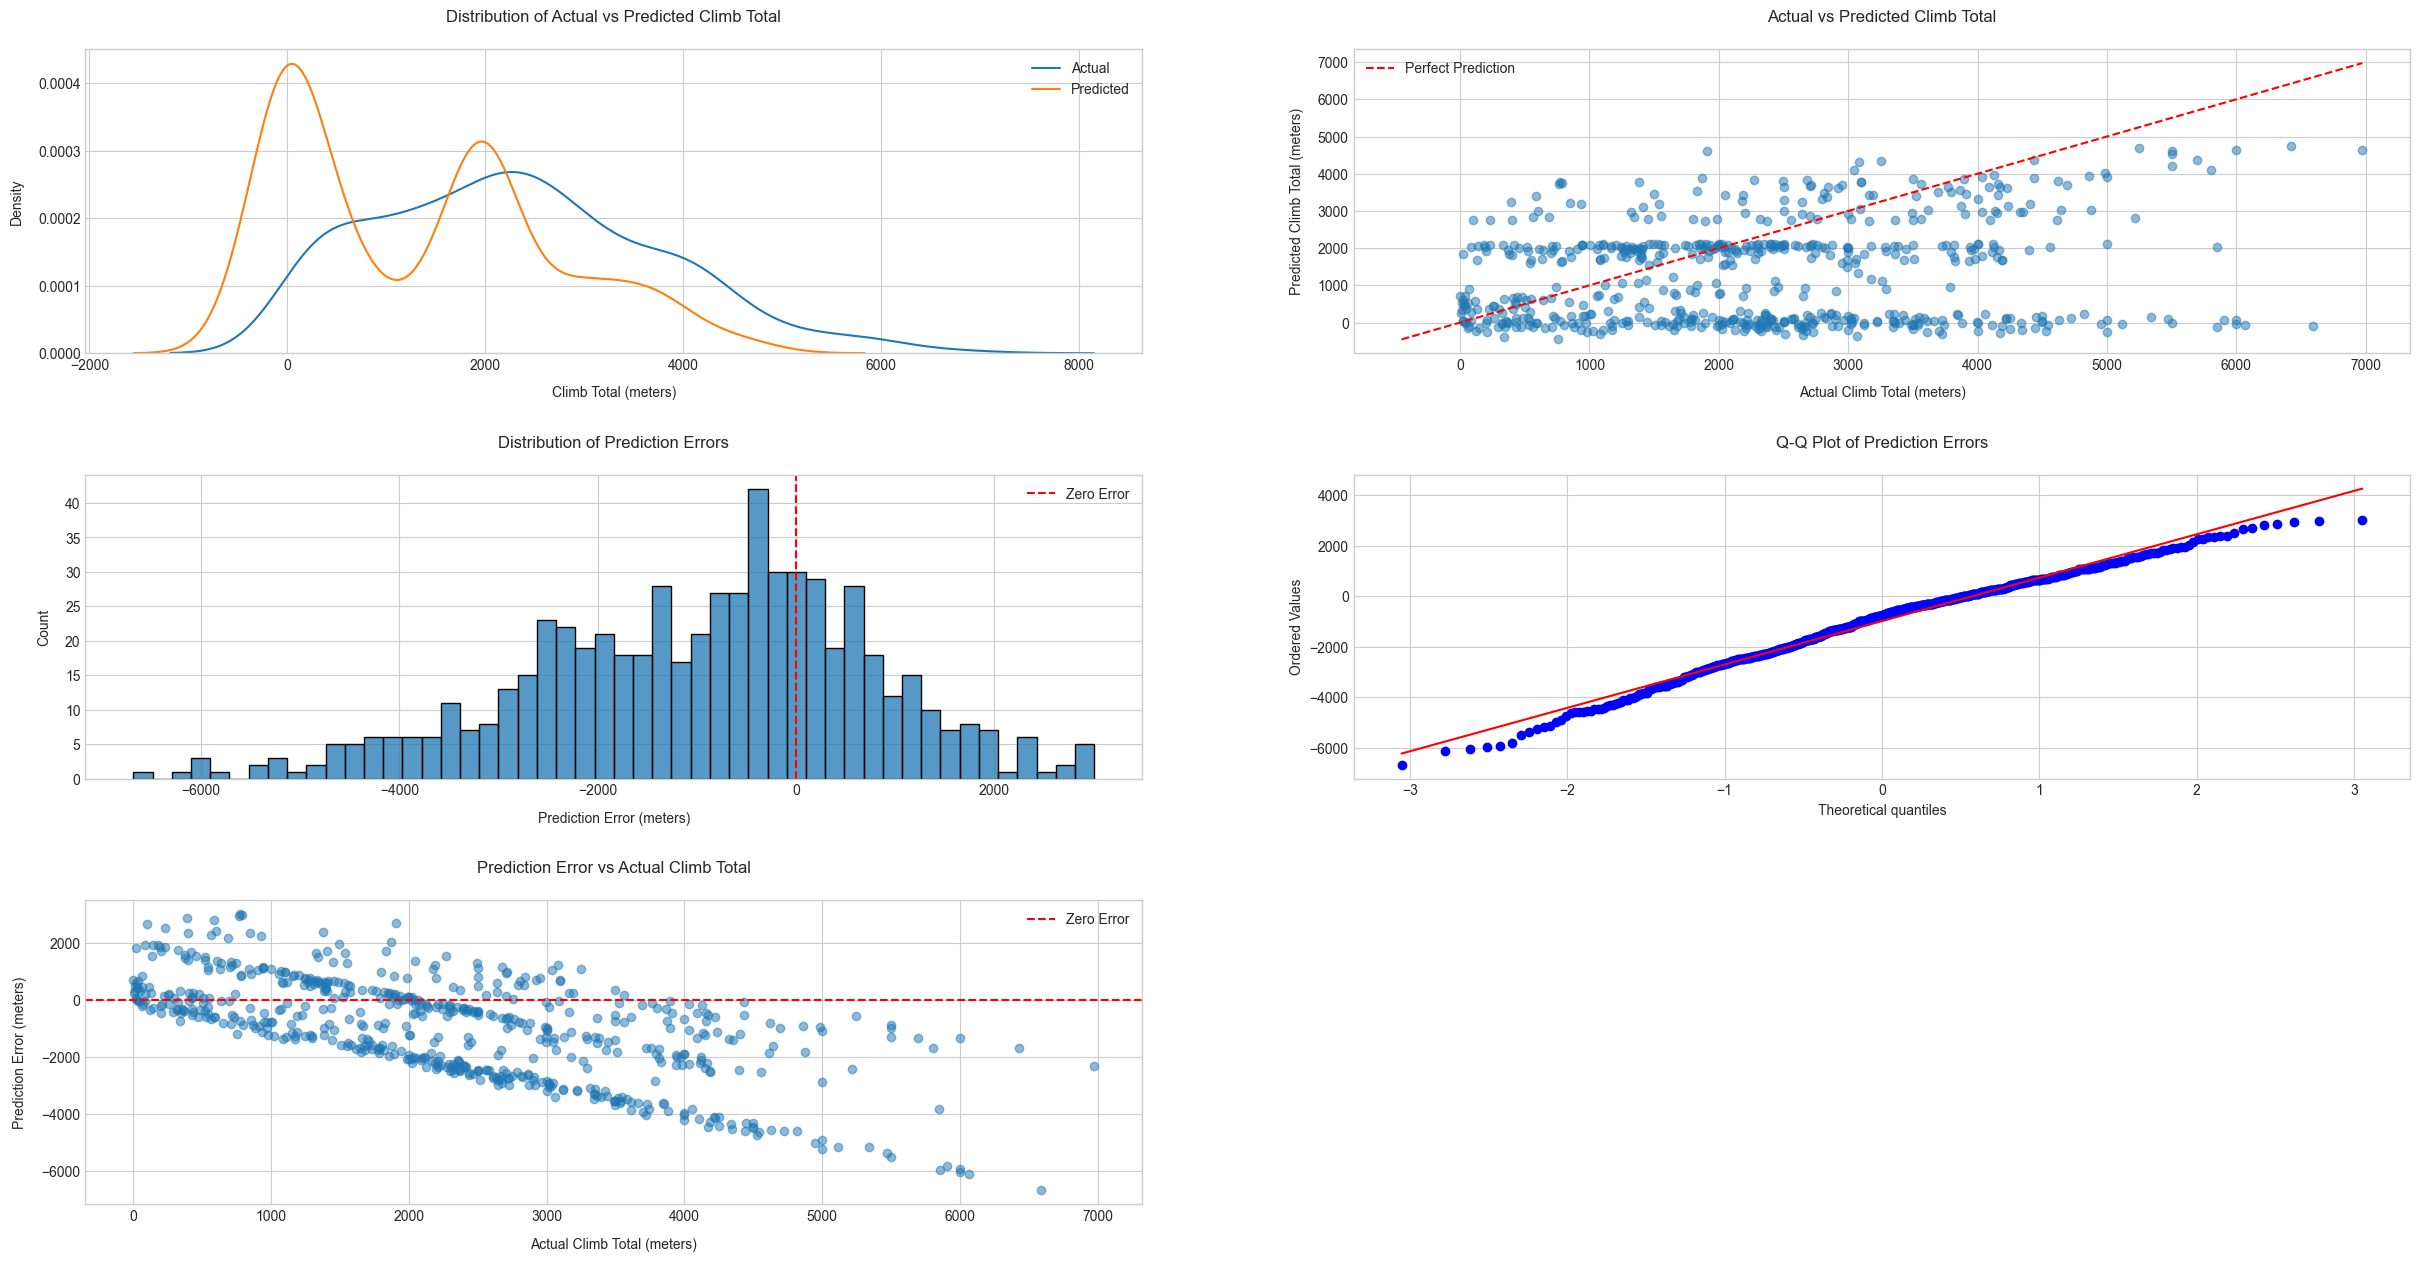

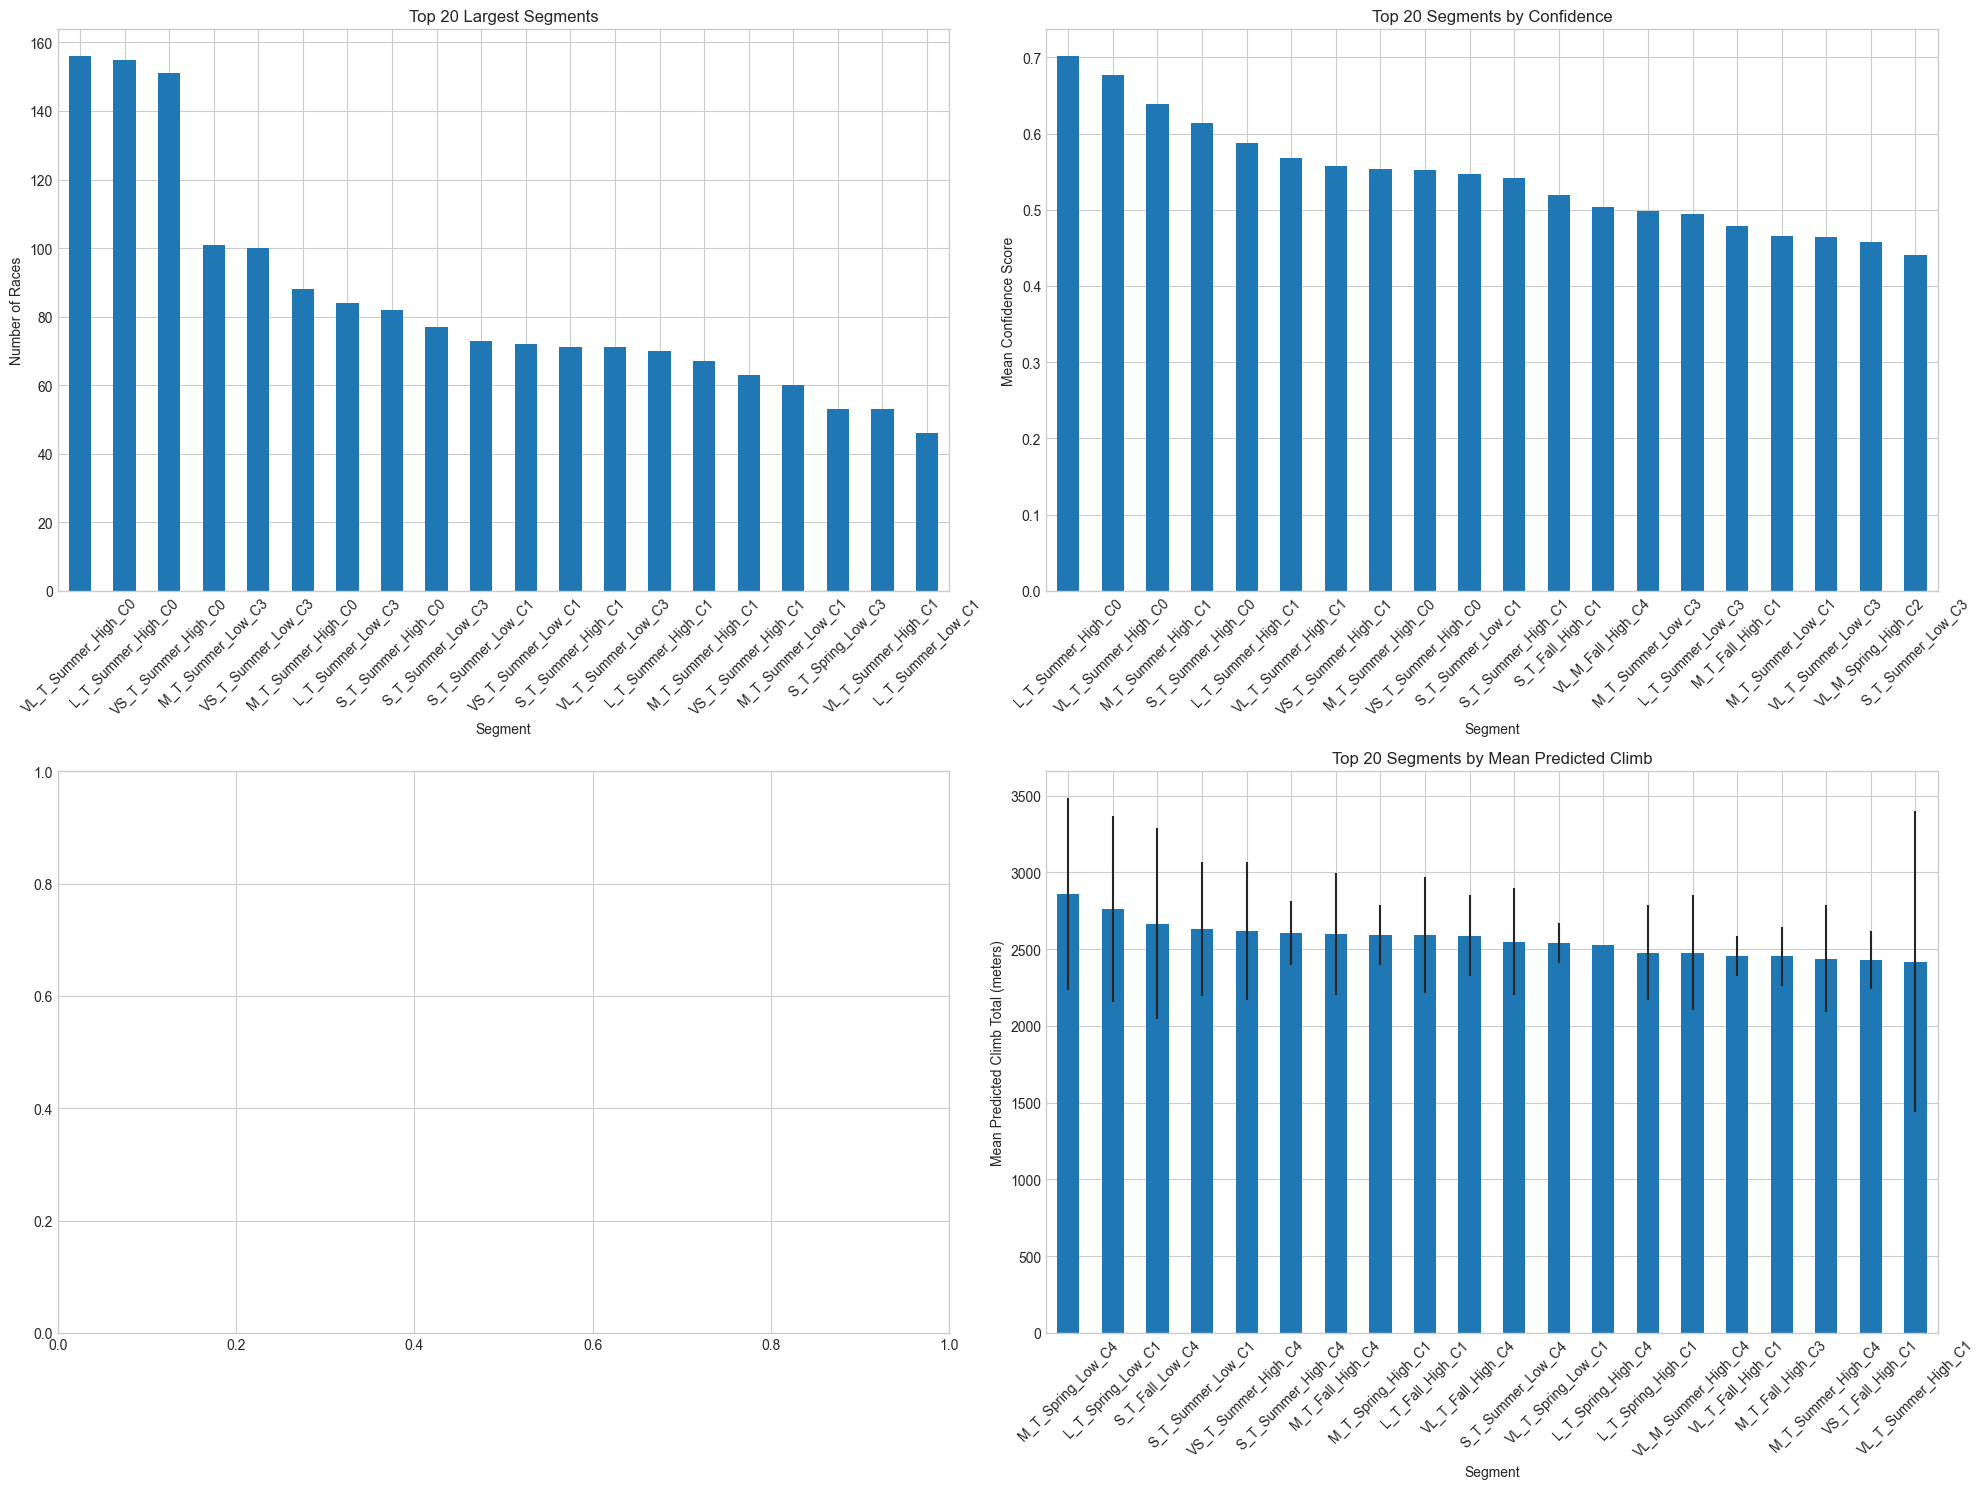

In [167]:


# Create all visualizations
predictions.loc[random_indices, 'climb_total'] = y_test
create_prediction_visualizations(predictions, y_test, stats_races, feature_name="climb_total")
create_segment_analysis(predictions, feature_name='climb_total')

# For interactive analysis in Jupyter notebook:
# %matplotlib inline
# plot_interactive_analysis(predictions)


### Distribution and Prediction Analysis

The distribution plot shows significant mismatch between actual and predicted values:

- Predicted values have a strong peak around 0-1000 meters.
- Actual values show a more spread out, multi-modal distribution.
- This suggests the model is oversimplifying the predictions.

### Actual vs Predicted Plot

Shows concerning patterns:

- Strong horizontal banding/striping.
- Poor alignment with the perfect prediction line.
- Systematic underprediction for higher values.
- Multiple distinct prediction bands suggesting the model might be discretizing its outputs.

### Feature Importance

Top influential features:

- Profile (~0.45 correlation)
- Length (~0.43 correlation)
- Startlist score per km (~0.38 correlation)

Less important features:

- Adjusted delta
- Is_tarmac
- Points
- Lower correlations (<0.1) for season, startlist_quality, team_present, and cyclist_age

### Prediction Confidence vs Error

Concerning relationship:

- Higher confidence scores generally associated with larger absolute errors.
- Wide spread of errors across all confidence levels.
- Many high-confidence predictions (0.5-0.7) show large errors (2000-6000 meters).

### Distribution of Prediction Confidence

Bimodal distribution:

- Large spike at 0.0 (very low confidence).
- Secondary peak around 0.6 (moderate-high confidence).
- Suggests the model is either very uncertain or possibly overconfident.

### Distribution Types

- Overwhelmingly gamma distribution (97.4%).
- Small portion of beta distribution (2.6%).
- This suggests the model expects right-skewed, positive-only predictions.

### Key Problems Identified

- Poor calibration between confidence and accuracy.
- Systematic underprediction of higher values.
- Discretization of predictions (banding).
- Mismatch between predicted and actual distributions.
- Overconfidence in some predictions despite large errors.

### Recommendations

- Investigate the cause of prediction banding.
- Recalibrate the confidence scoring system.
- Consider ensemble methods to better handle the multi-modal distribution.
- Feature engineering to better capture the relationship between profile/length and climb total.
- Consider using different evaluation metrics that better capture the multi-modal nature of the data.

This analysis suggests the model needs significant improvement, particularly in handling the full range of climb totals and providing more reliable confidence estimates.

### Explanation of KNN Imputation Code

This code performs the following tasks:

1. **Imports and Setup**:
    - Imports necessary libraries including `KNNImputer` from `sklearn`, `logging`, and `warnings`.

2. **Feature Engineering**:
    - The `engineer_features` function processes date features and calculates derived features such as `points_per_km` and `season_score`.

3. **Predict Climb Total**:
    - The `predict_climb_total` function predicts missing `climb_total` values using KNN imputation.
    - Validates input data and ensures all required columns are present.
    - Engineers additional features and updates the feature set.
    - Applies KNN imputation to predict missing values.
    - Calculates and logs validation metrics if `y_true` is provided.

4. **Example Usage**:
    - Demonstrates the usage of the `predict_climb_total` function on a test dataset.
    - Randomly selects 20% of the data, sets their `climb_total` values to NaN, and predicts these values.
    - Prints the calculated metrics including RMSE, R², MAE, and MSE.

INFO:__main__:Starting prediction process...
INFO:__main__:Engineering features...
INFO:__main__:Applying KNN imputation...
INFO:__main__:Calculating validation metrics...
INFO:__main__:y_pred shape: (613,), y_true shape: (613,)
INFO:__main__:Validation metrics: RMSE=27.75, R2=0.71



Metrics:
MSE: 770.25
RMSE: 27.75
MAE: 577.35
R2: 0.71
SAMPLES_USED: 613
CV_RMSE: nan
CV_RMSE_STD: nan


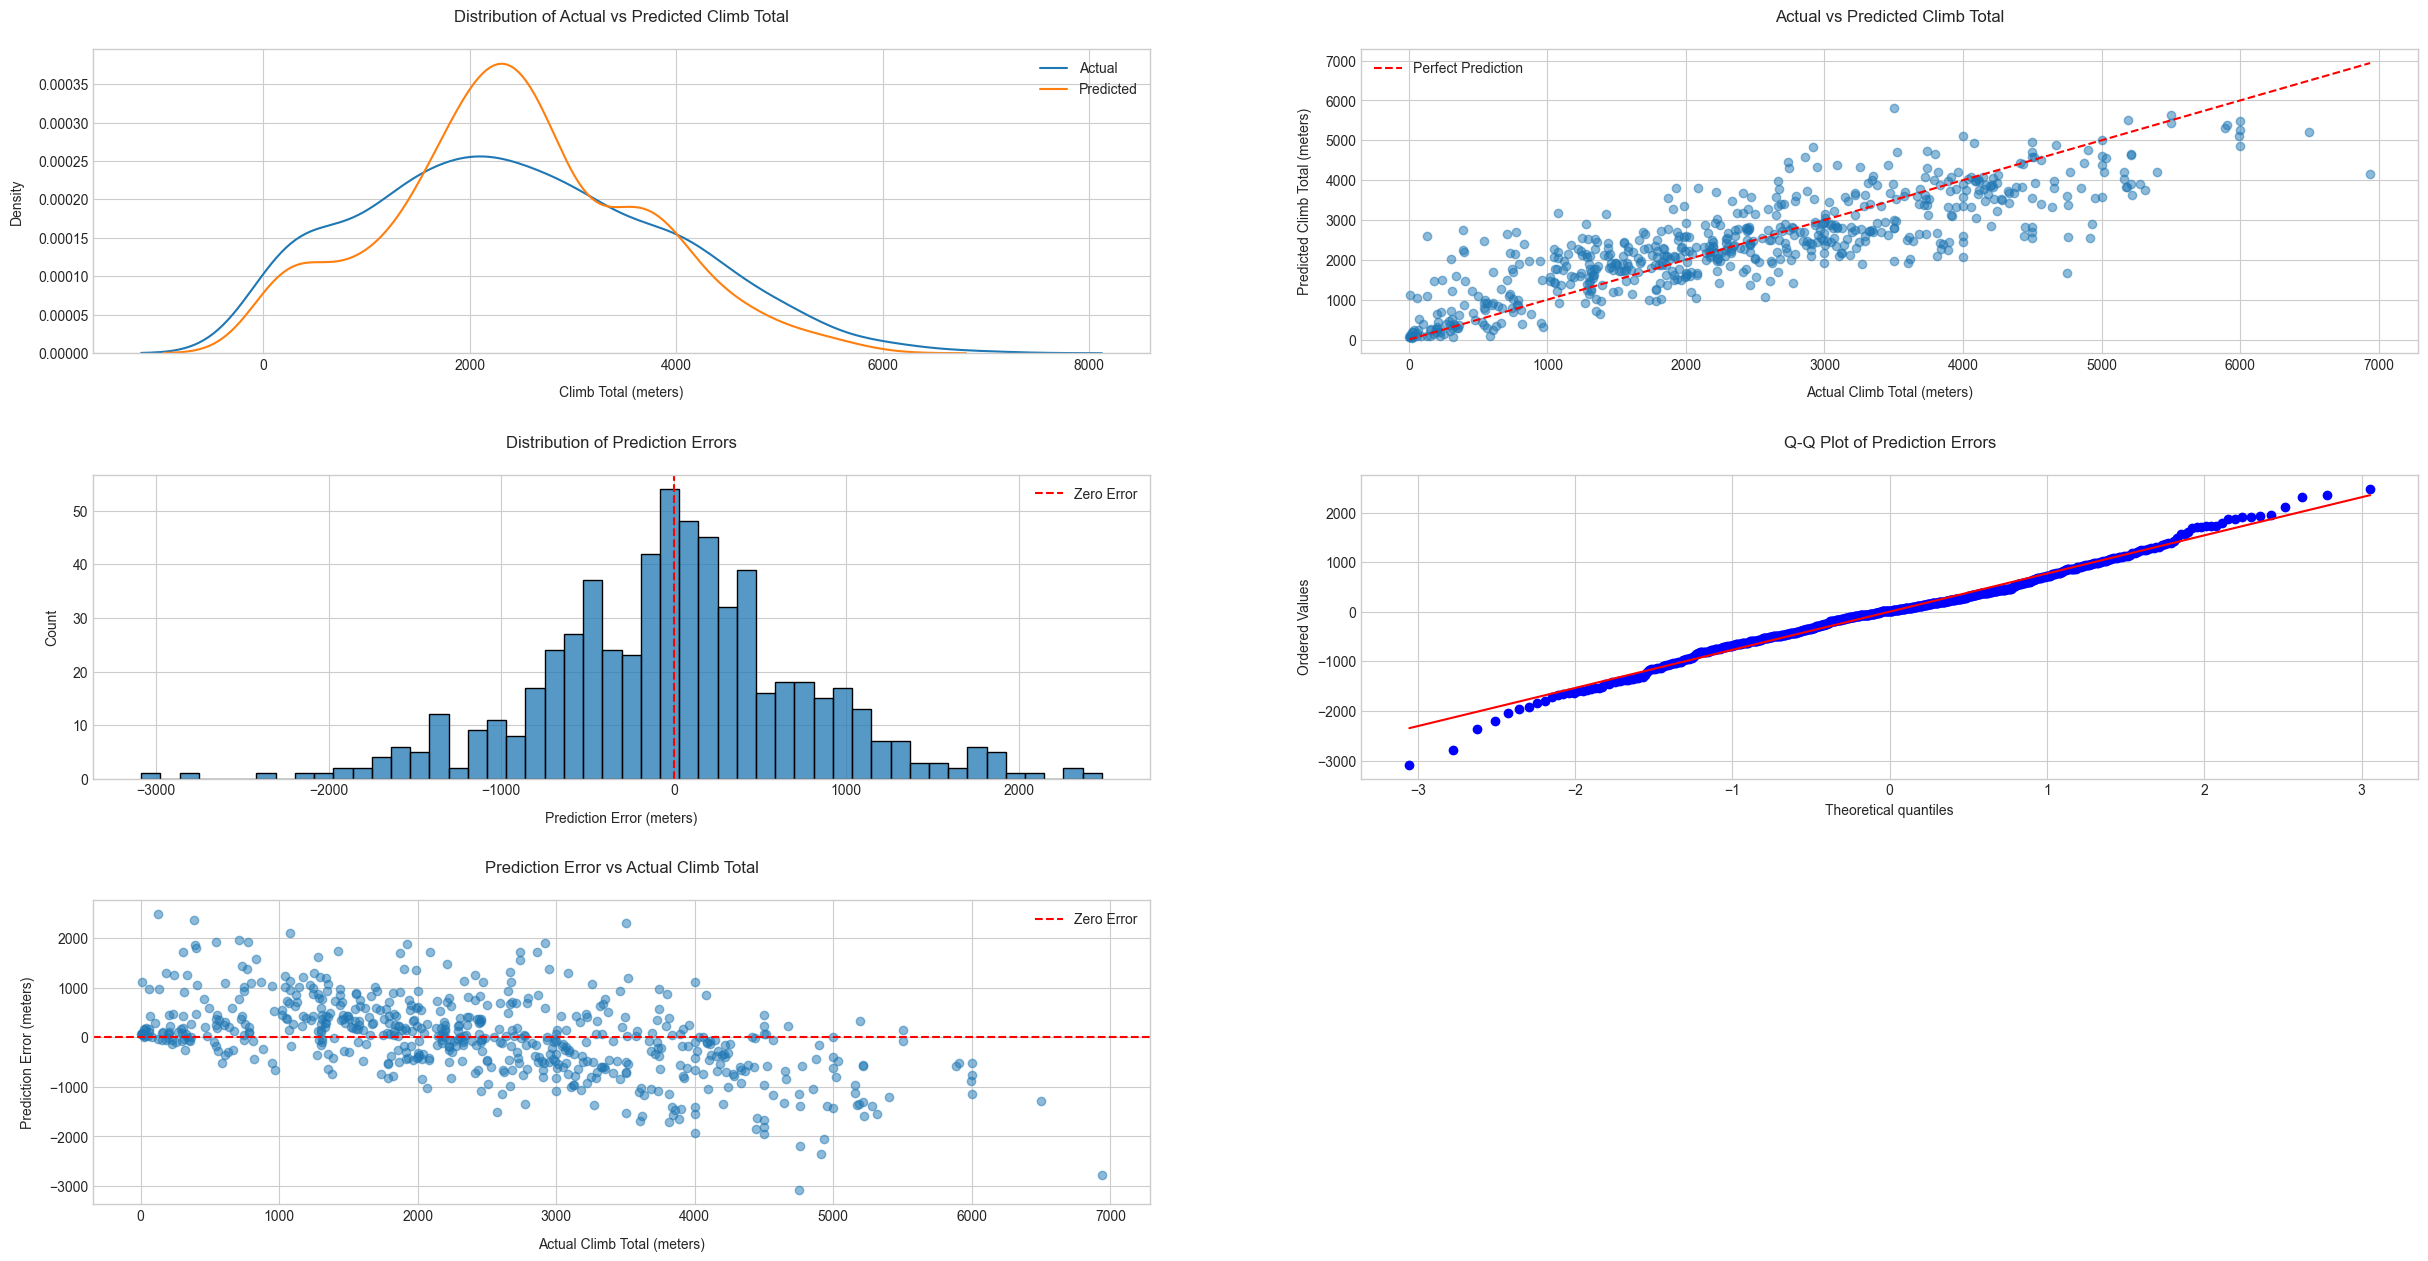

In [146]:
from sklearn.impute import KNNImputer
import logging
from typing import Tuple, Optional, Dict
import warnings

def engineer_features(df) -> pd.DataFrame:
            
            
    # Process date features
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear

    # Calculate derived features
    df['points_per_km'] = (df['points'] / df['length']).fillna(0)


    # Create seasonal feature
    df['season_score'] = np.sin(2 * np.pi * df['day_of_year'] / 365)

    return df

def predict_climb_total(
    df: pd.DataFrame,
    features: Dict[str, Dict[str, str]],
    y_true: pd.Series | None = None,
    n_neighbors: int = 5,
    min_samples_required: int = 100,
    return_metrics: bool = True
) -> Tuple[pd.DataFrame, Optional[Dict[str, float]]]:
    """
    Predicts missing climb_total values in cycling race data using KNN imputation
    with advanced feature engineering and validation.
    """
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)
    warnings.filterwarnings('ignore', category=UserWarning)
    
    try:
        # Validate input data
        missing_race_cols = [col for col in features if col not in df.columns]
        if missing_race_cols:
            raise ValueError(f"Missing required columns. Races: {missing_race_cols}")

        logger.info("Starting prediction process...")
        
        # Feature engineering
        logger.info("Engineering features...")
        df = engineer_features(df)
        
        features = {**features, 'climb_total': {'type': 'numeric'}, 
                   'points_per_km': {'type': 'numeric'}, 'season_score': {'type': 'numeric'}, 
                   'month': {'type': 'categorical'}}
        
        X = df[features.keys()].copy()
        
        if len(X) < min_samples_required:
            raise ValueError(f"Insufficient data: {len(X)} samples, {min_samples_required} required")
        
        
        
        # Apply KNN imputation
        logger.info("Applying KNN imputation...")
        imputer = KNNImputer(n_neighbors=n_neighbors, weights='distance')
        X_imputed = imputer.fit_transform(X)
        
    
        
        # Extract only the climb_total column from predictions
        climb_total_idx = list(X.columns).index('climb_total')
        predicted_climb_total = X_imputed[:, climb_total_idx]

        y_pred = pd.Series(predicted_climb_total, index=X.index, name='climb_total_predicted')
        
        
        # Calculate metrics if requested
        metrics = None
        if return_metrics and y_true is not None:
            logger.info("Calculating validation metrics...")
            y_pred = y_pred.loc[y_true.index]  # Ensure we're comparing 1D arrays 
            logger.info(f"y_pred shape: {y_pred.shape}, y_true shape: {y_true.shape}")

            
            mse_con = mse(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            rmse = np.sqrt(mse_con)
            mae = np.mean(np.abs(y_true - y_pred))
            cv_score = cross_val_score(
                imputer,
                X.loc[y_true.index], y_true, cv=5, scoring='neg_mean_squared_error'
            )
            metrics = {
                'mse': round(mse_con, 2),
                'rmse': round(rmse, 2),
                'mae': round(mae, 2),
                'r2': round(r2, 2),
                'samples_used': len(y_pred),
                'cv_rmse': round(-cv_score.mean(), 2),
                'cv_rmse_std': round(cv_score.std(), 2)
            }
            errors_visualization(y_true, y_pred) 
            logger.info(f"Validation metrics: RMSE={rmse:.2f}, R2={r2:.2f}")
        else:
            logger.info("Prediction complete")
        
        return metrics
    
    except Exception as e:
        logger.error(f"Error in prediction process: {str(e)}")
        raise RuntimeError(f"Prediction failed: {str(e)}")




df_test = races_agg[races_agg['climb_total'].notna()].copy()
random_indices = df_test.sample(frac=0.2).index
y_test = df_test.loc[random_indices, 'climb_total']

df_test.loc[random_indices, 'climb_total'] = np.nan

metrics = predict_climb_total(df_test, y_true=y_test, features=pred_features)

metrics

# print the metrics
print("\nMetrics:")
for key, value in metrics.items():
    print(f"{key.upper()}: {value}")


### Overall Model Performance

The model uses KNN imputation to predict missing `climb_total` values. The plots show relatively good prediction accuracy, with an R² score indicated in the metrics. Most predictions fall reasonably close to the "Perfect Prediction" line in the second plot.

### Error Analysis (from the plots)

#### a) Prediction Error vs Actual (Image 1):

- The errors appear roughly symmetrically distributed around zero (red dashed line).
- The spread of errors increases with larger climb totals.
- Most errors fall within ±1000 meters.
- There's some heteroscedasticity - larger climb totals show more variance in predictions.
- A few notable outliers exist, especially for climbs over 5000m.

#### b) Actual vs Predicted Plot (Image 2, top):

- Shows a strong positive correlation between predicted and actual values.
- Points cluster well around the "Perfect Prediction" line (red dashed).
- More scatter/variance at higher climb totals.
- The model performs best in the 1000-4000m range.
- Some underprediction tendency for very high climb totals (>5000m).

#### c) Q-Q Plot (Image 2, bottom):

- The blue dots following the red line indicate normally distributed errors.
- Some deviation at the tails suggests slightly heavier tails than normal distribution.
- Small departures at extreme values, especially below -2000m.

#### d) Distribution Plots (Image 3):

- **Top**: Shows the distribution of actual (blue) vs predicted (orange) climb totals.
    - The model captures the general shape of the distribution.
    - Slight overconcentration around 2000-3000m in predictions.
    - Some underestimation of extreme values.
- **Bottom**: Distribution of prediction errors.
    - Approximately normal distribution centered near zero.
    - Slightly right-skewed.
    - Most errors fall within ±1000m.
    - Few outliers beyond ±2000m.

### Overall Assessment

- The model performs reasonably well for most climb totals.
- More accurate for moderate climbs (1000-4000m).
- Less reliable for extreme values, especially very high climbs.
- Errors are generally well-behaved (roughly normal distribution).
- The model could potentially be improved for handling extreme values and reducing heteroscedasticity.